In [262]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import re
import scipy.io as scio
import sharpy.utils.algebra as algebra
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

# First HALE-MPC Control Attempt

In [2]:
cs = []
thrust = []
with open('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop/input_history.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        ll = line.split(',')
        try:
            cs.append(float(ll[0]))
            thrust.append(float(ll[1]))
        except ValueError:
            pass
        
cs = np.array(cs)
thrust = np.array(thrust)

In [3]:
ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_pos.dat')

In [323]:
ol_quat = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_quat.dat')
ol_pitch = np.array([algebra.quat2euler(ol_quat[n, -4:]) for n in range(ol_quat.shape[0])])[:, 1]

In [113]:
cl1 = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop/WriteVariablesTime/FoR_00_for_pos.dat')

## Vertical displacement vs thrust input

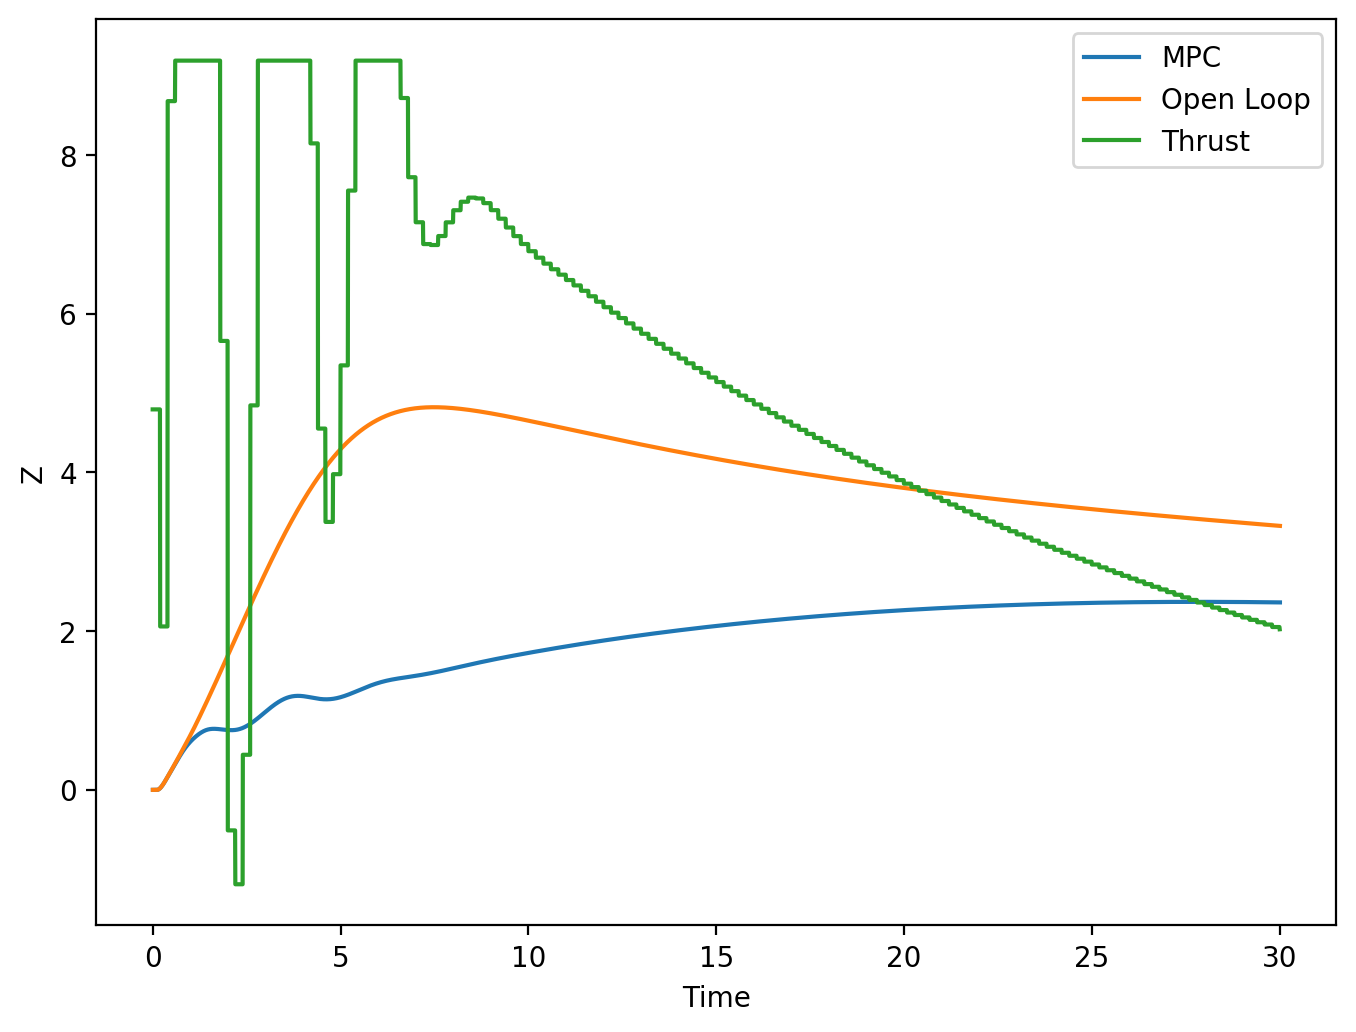

In [5]:
plt.plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
plt.plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

plt.plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
# plt.xlim(0, 6)

In [116]:
vel_cl1 = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop/WriteVariablesTime/FoR_00_for_vel.dat')

In [117]:
vel_ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_vel.dat')

In [123]:
aoa_cl1 = np.arctan(vel_cl1[:, 3]/vel_cl1[:, 1])
aoa_ol = np.arctan(vel_ol[:, 3]/vel_ol[:, 1])

## Angle of attack vs elevator input

Text(0, 0.5, 'Angle of attack, deg')

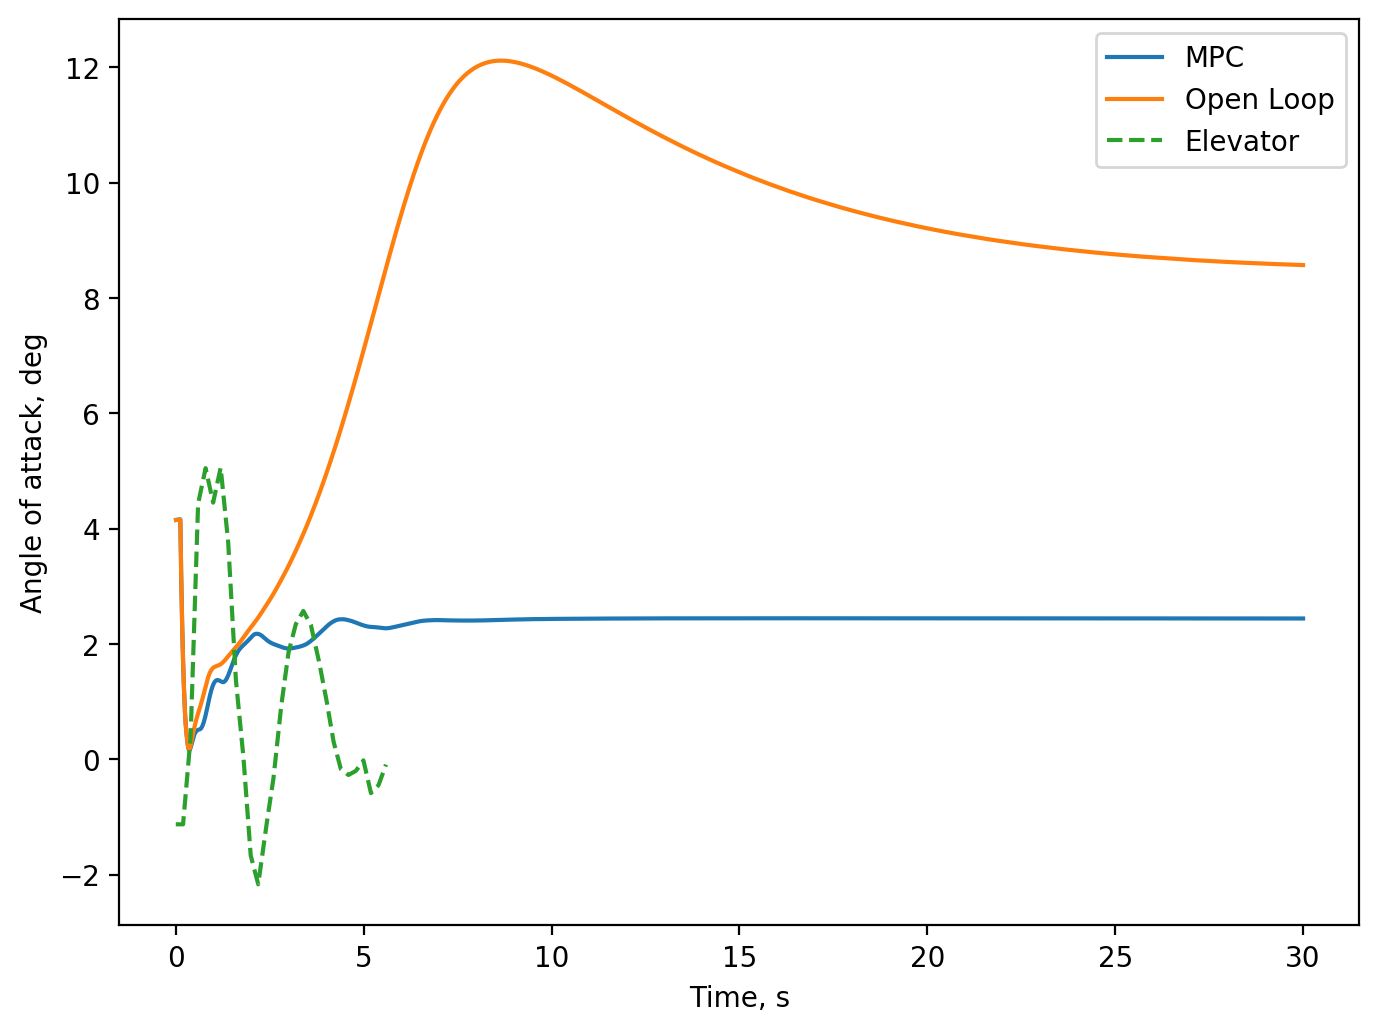

In [127]:
plt.plot(cl1[:, 0] / 160, aoa_cl1 * 180 / np.pi, label='MPC')
plt.plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop')
plt.plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Angle of attack, deg')

Text(0, 0.5, 'True Airspeed, m/s')

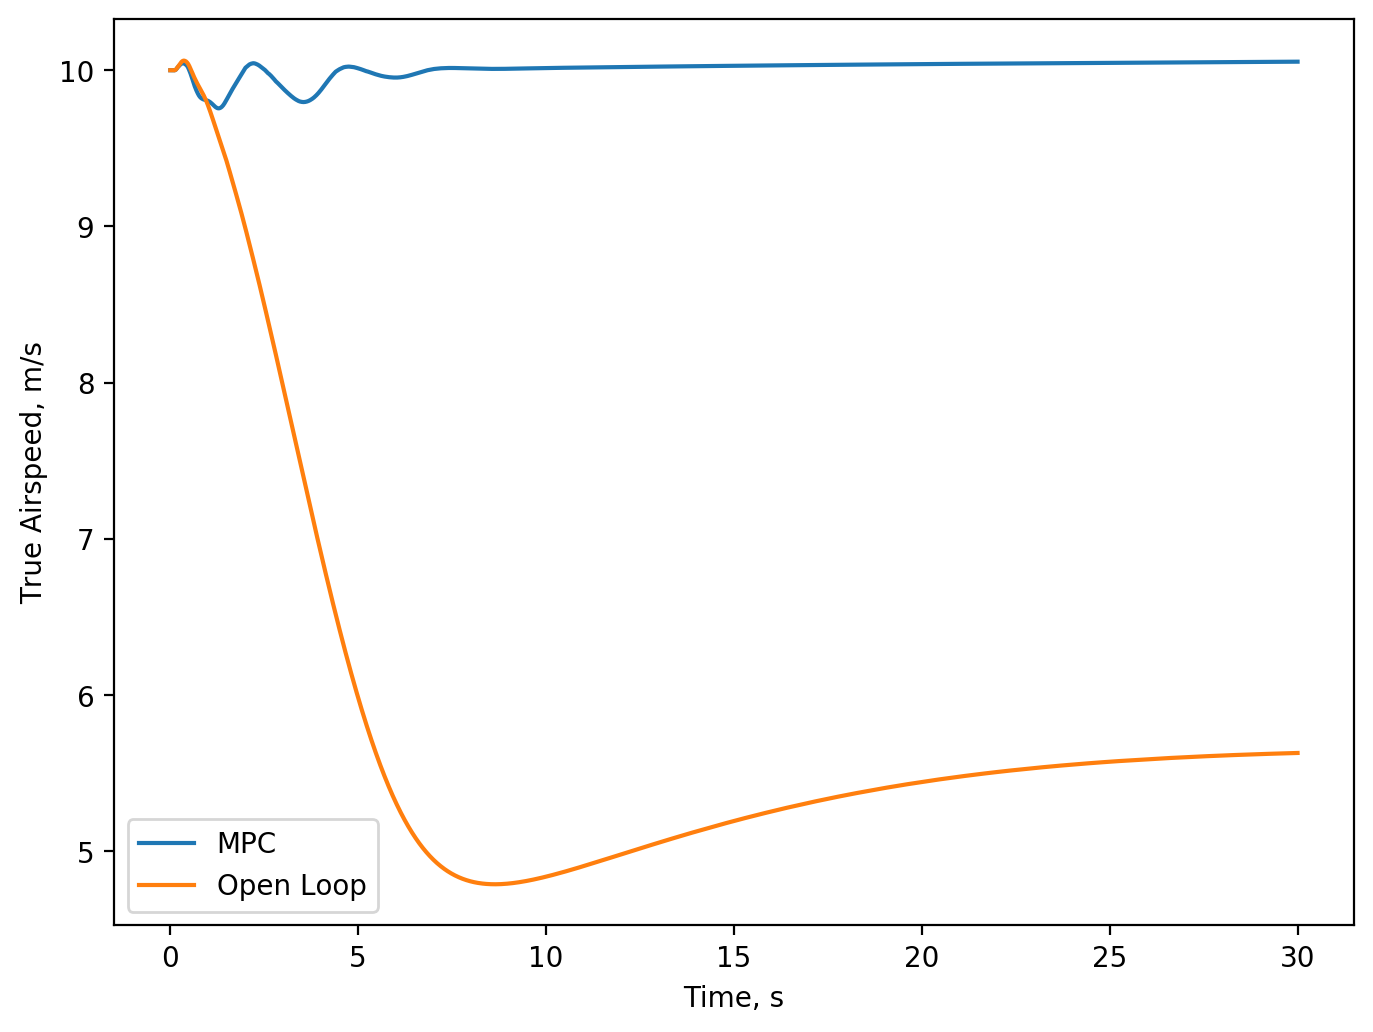

In [10]:
plt.plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
plt.plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('True Airspeed, m/s')

# Second HALE attempt

Issues in transmitting/receiving data in MHE after ts 782

In [87]:
cs = []
thrust = []
with open('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case2/input_history.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        ll = line.split(',')
        try:
            cs.append(float(ll[0]))
            thrust.append(float(ll[1]))
        except ValueError:
            pass
        
cs = np.array(cs)
thrust = np.array(thrust)

In [88]:
ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_pos.dat')

In [89]:
cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case2/WriteVariablesTime/FoR_00_for_pos.dat')

## Vertical displacement vs thrust input

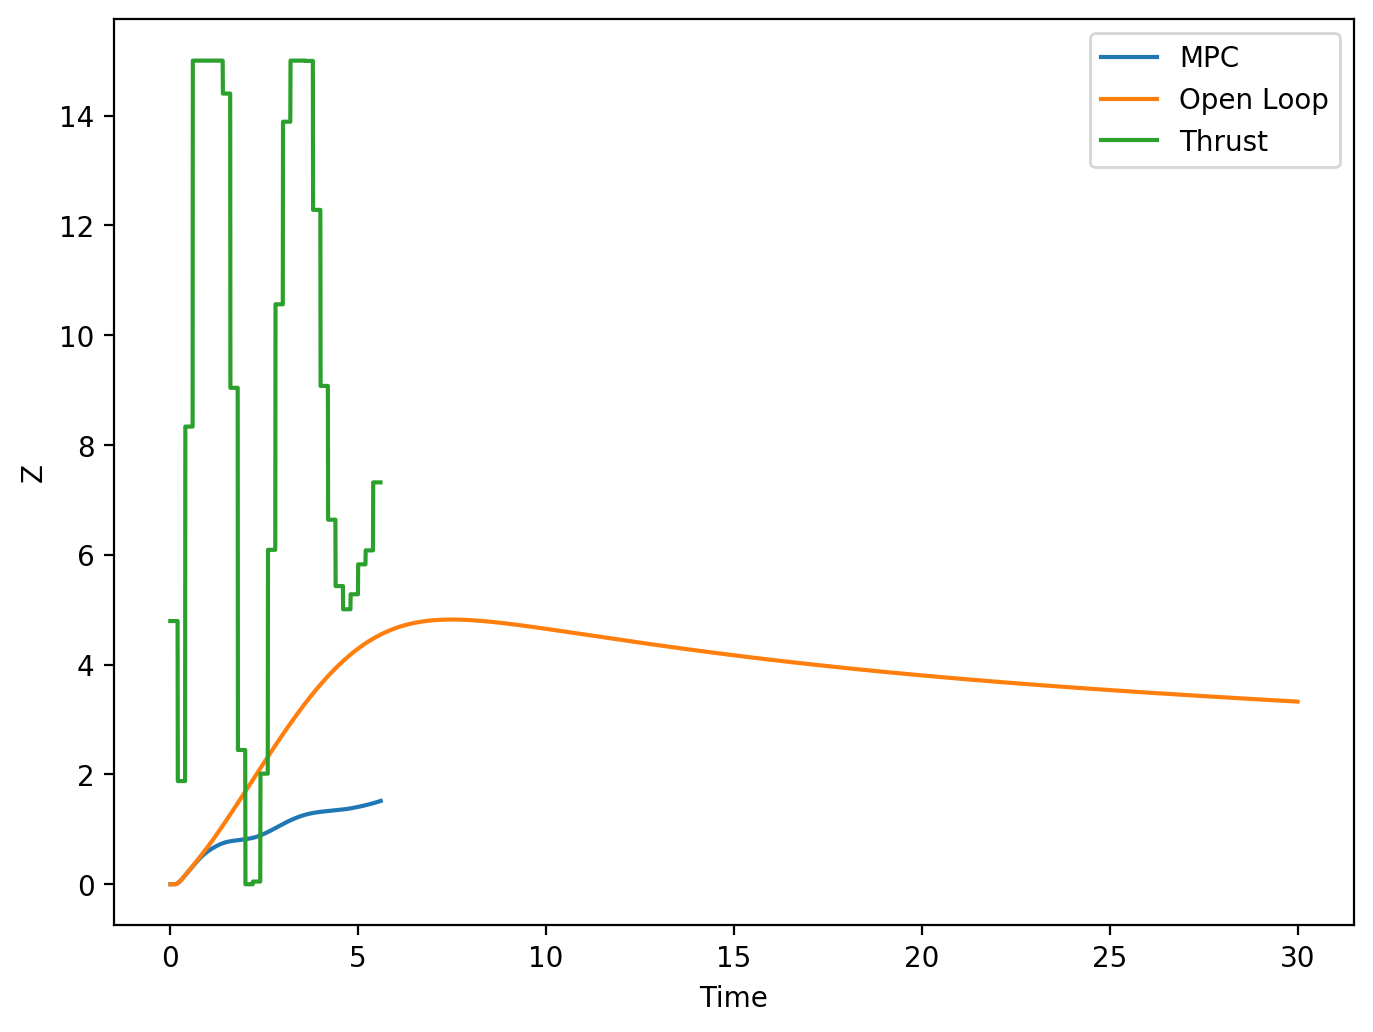

In [90]:
plt.plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
plt.plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

plt.plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
# plt.xlim(0, 6)

In [91]:
vel_cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case2/WriteVariablesTime/FoR_00_for_vel.dat')

In [92]:
vel_ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_vel.dat')

In [93]:
aoa_cl = np.arctan(vel_cl[:, 3]/vel_cl[:, 1])
aoa_ol = np.arctan(vel_ol[:, 3]/vel_ol[:, 1])

## Angle of attack vs elevator input

Text(0, 0.5, 'Angle of attack, deg')

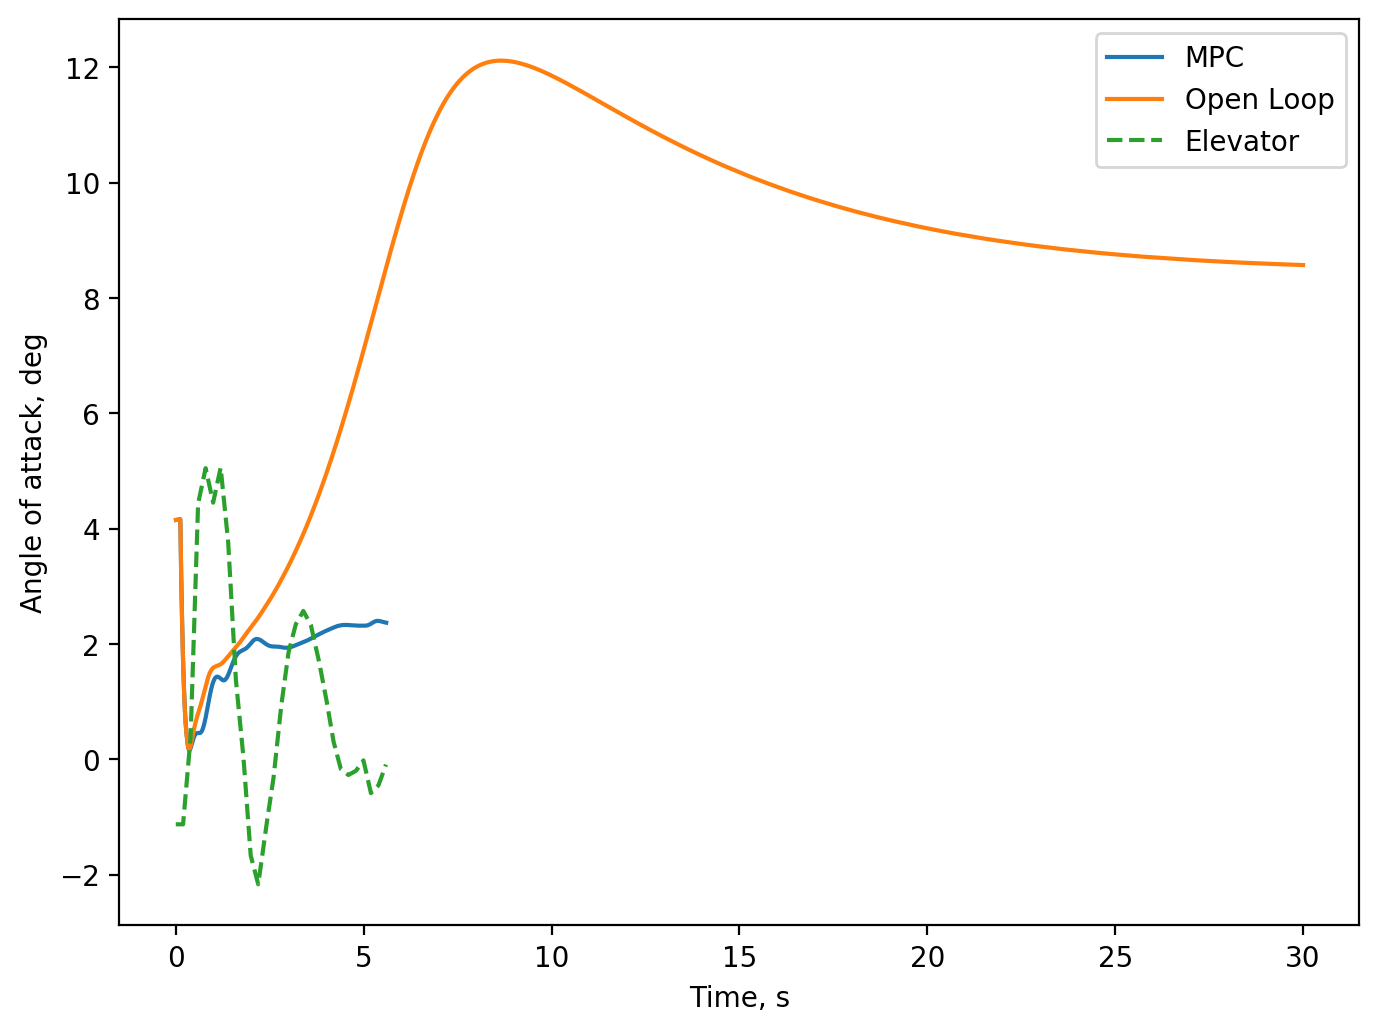

In [94]:
plt.plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
plt.plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop')
plt.plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Angle of attack, deg')

Text(0, 0.5, 'True Airspeed, m/s')

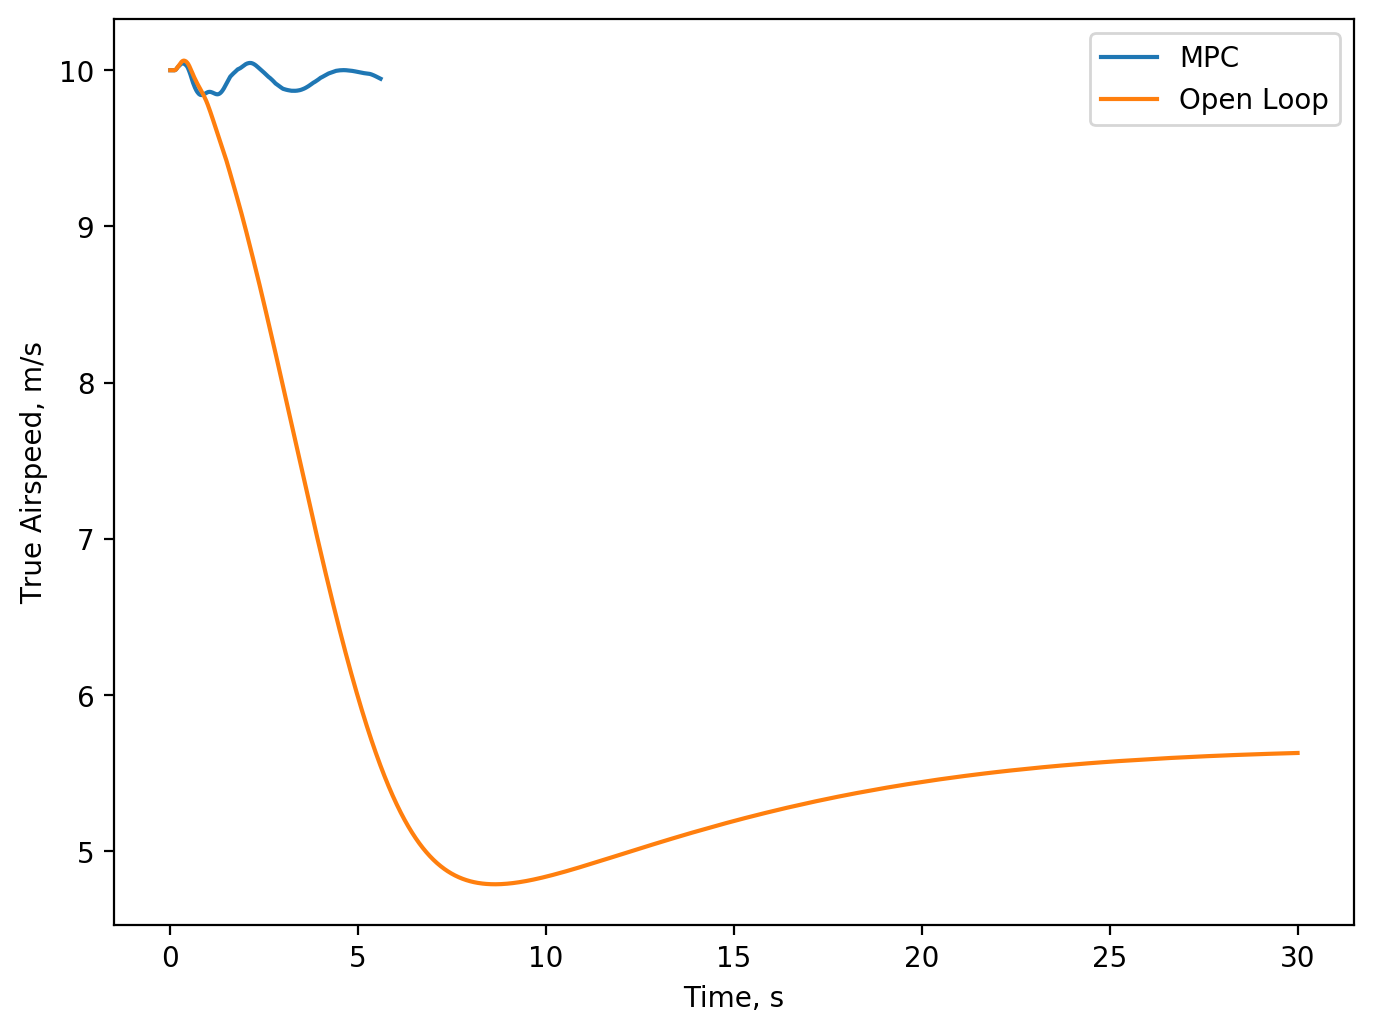

In [95]:
plt.plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
plt.plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('True Airspeed, m/s')

In [104]:
780/160

4.875

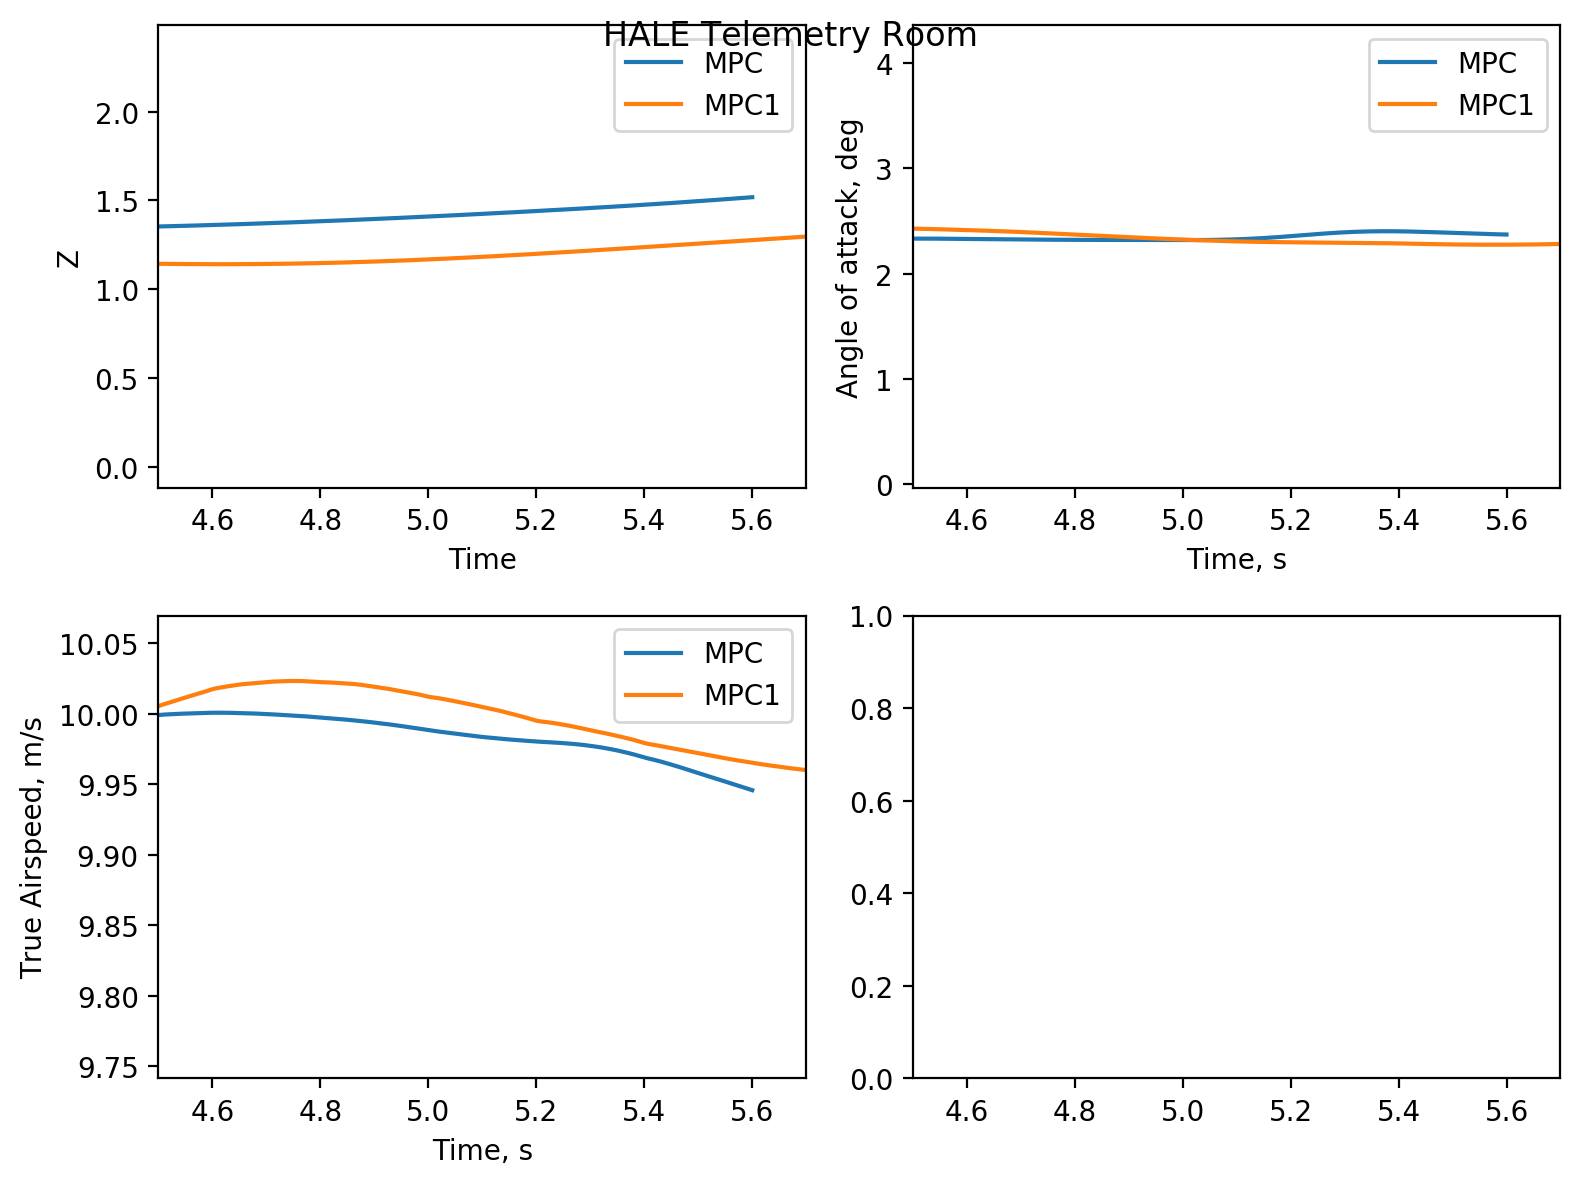

In [126]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.suptitle('HALE Telemetry Room')


ax[0, 0].plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
ax[0, 0].plot(cl1[:, 0] / 160, cl1[:, 3], label='MPC1')


# ax[0, 0].plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

# ax[0, 0].plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Z')
ax[0, 0].legend()

ax[0, 1].plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
ax[0, 1].plot(cl1[:, 0] / 160, aoa_cl1 * 180 / np.pi, label='MPC1')


# ax[0, 1].plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop', ls=':')
# ax[0, 1].plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
ax[0, 1].legend()
ax[0, 1].set_xlabel('Time, s')
ax[0, 1].set_ylabel('Angle of attack, deg')

ax[1, 0].plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
ax[1, 0].plot(cl1[:, 0] / 160, np.linalg.norm(vel_cl1[:, 1:], axis=1), label='MPC1')


# ax[1, 0].plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
ax[1, 0].legend()
ax[1, 0].set_xlabel('Time, s')
ax[1, 0].set_ylabel('True Airspeed, m/s')



for a in ax.reshape(-1):
    a.set_xlim(4.5, 5.7)
#     a.plot([780/160] * 2,[0, 10], ls=':', color='k', lw=0.5)


    
plt.tight_layout()



# Third attempt

In [173]:
cs = []
thrust = []
with open('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case3/input_history.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        ll = line.split(',')
        try:
            cs.append(float(ll[0]))
            thrust.append(float(ll[1]))
        except ValueError:
            pass
        
cs = np.array(cs)
thrust = np.array(thrust)

In [174]:
ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_pos.dat')

In [175]:
cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case3/WriteVariablesTime/FoR_00_for_pos.dat')

## Vertical displacement vs thrust input

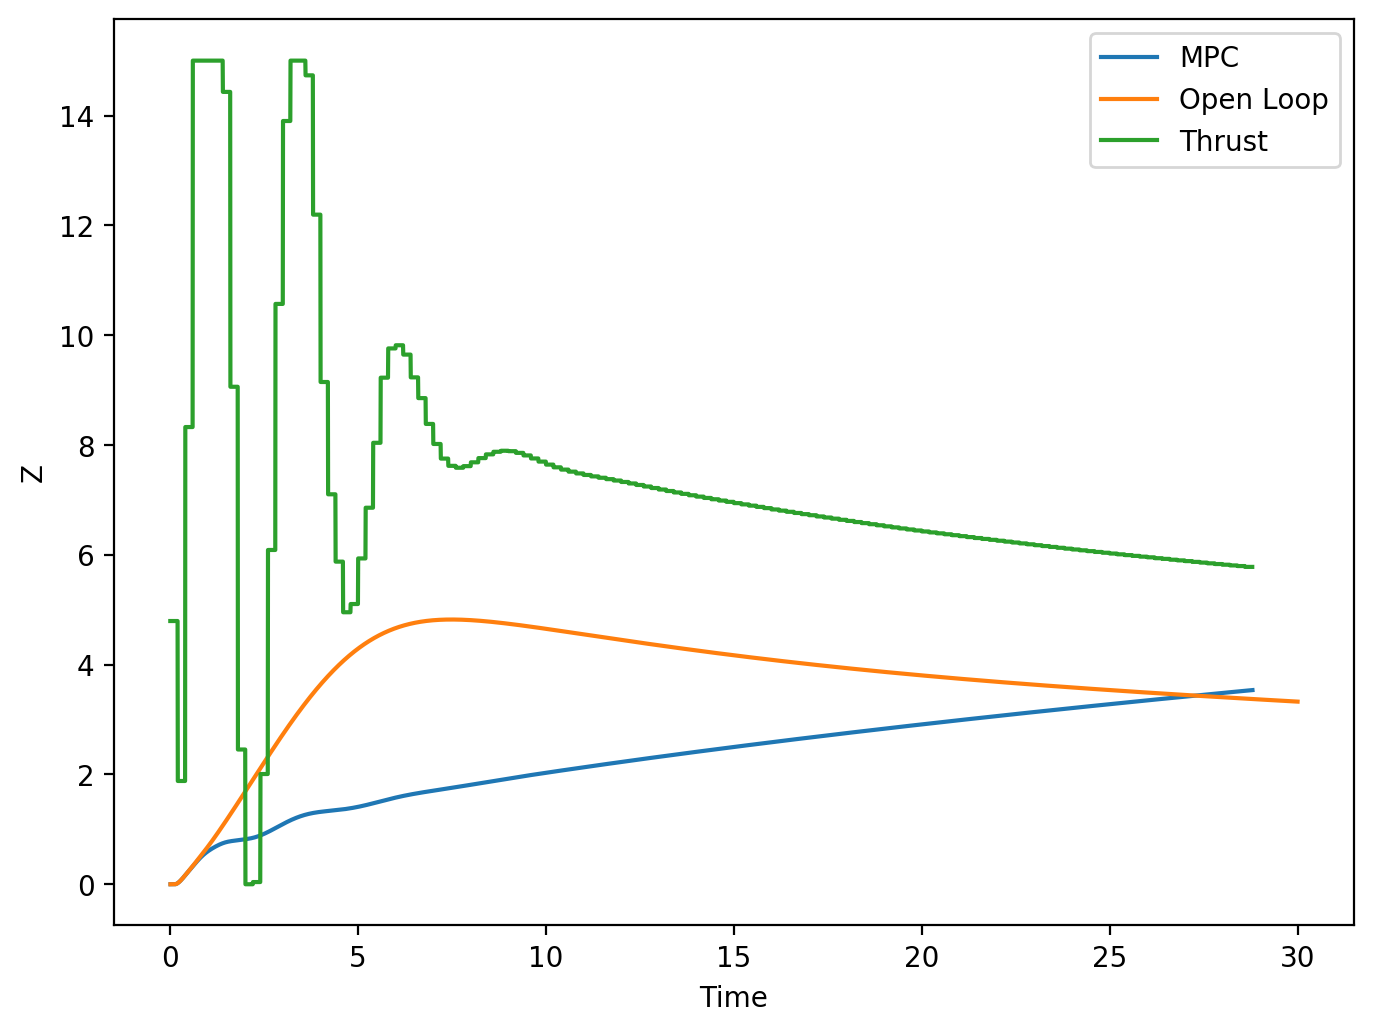

In [176]:
plt.plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
plt.plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

plt.plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
# plt.xlim(0, 6)

In [177]:
vel_cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case3/WriteVariablesTime/FoR_00_for_vel.dat')

In [178]:
vel_ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_vel.dat')

In [179]:
aoa_cl = np.arctan(vel_cl[:, 3]/vel_cl[:, 1])
aoa_ol = np.arctan(vel_ol[:, 3]/vel_ol[:, 1])

## Angle of attack vs elevator input

Text(0, 0.5, 'Angle of attack, deg')

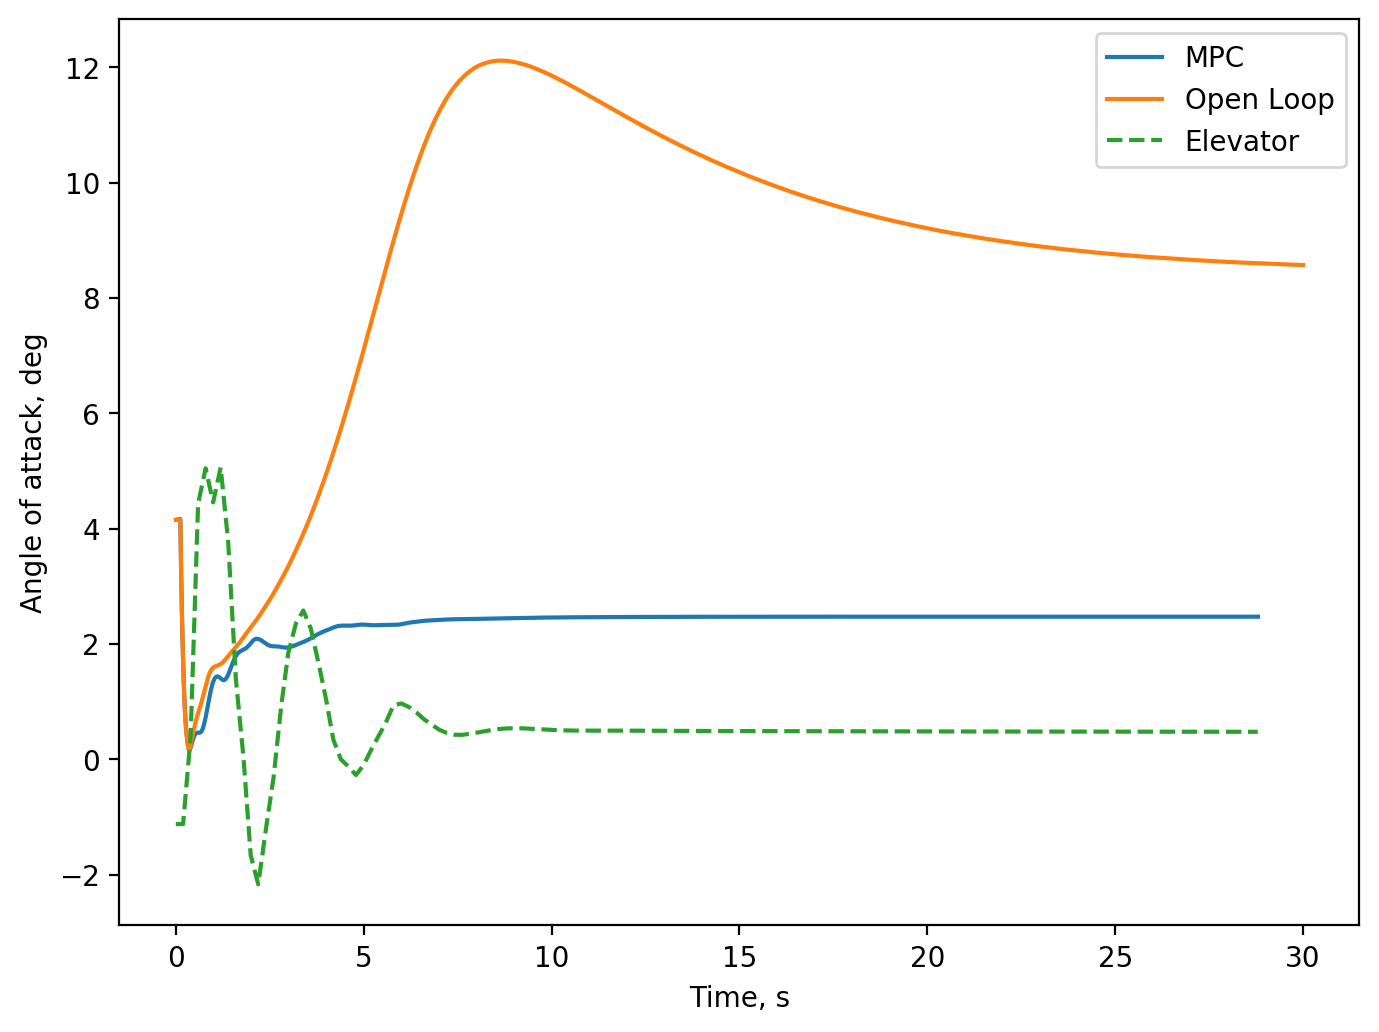

In [180]:
plt.plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
plt.plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop')
plt.plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Angle of attack, deg')

Text(0, 0.5, 'True Airspeed, m/s')

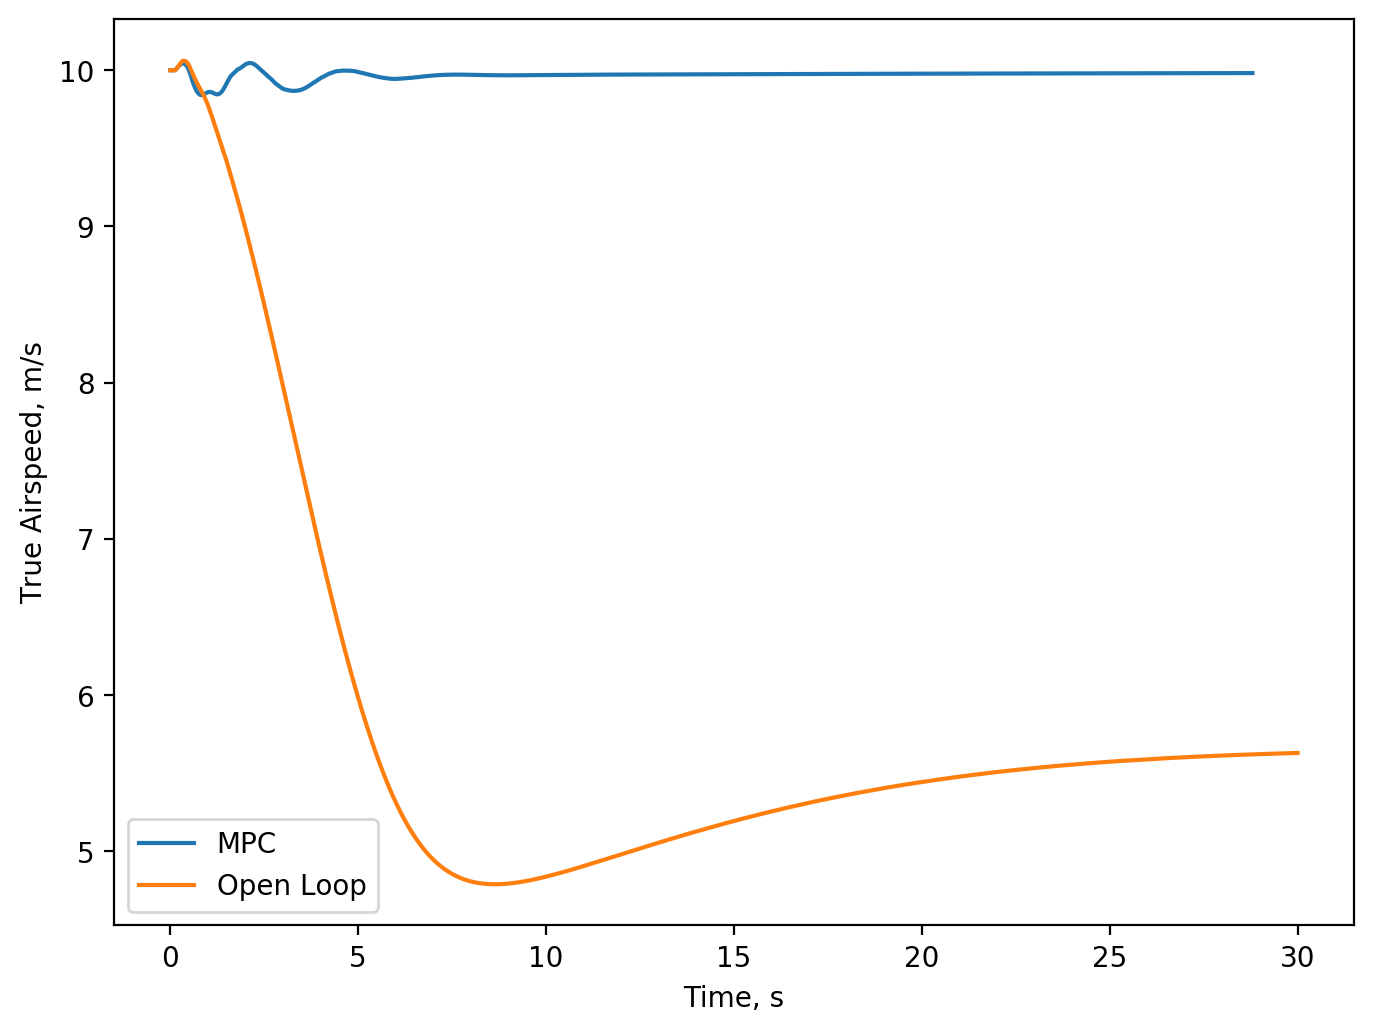

In [181]:
plt.plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
plt.plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('True Airspeed, m/s')

In [182]:
780/160

4.875

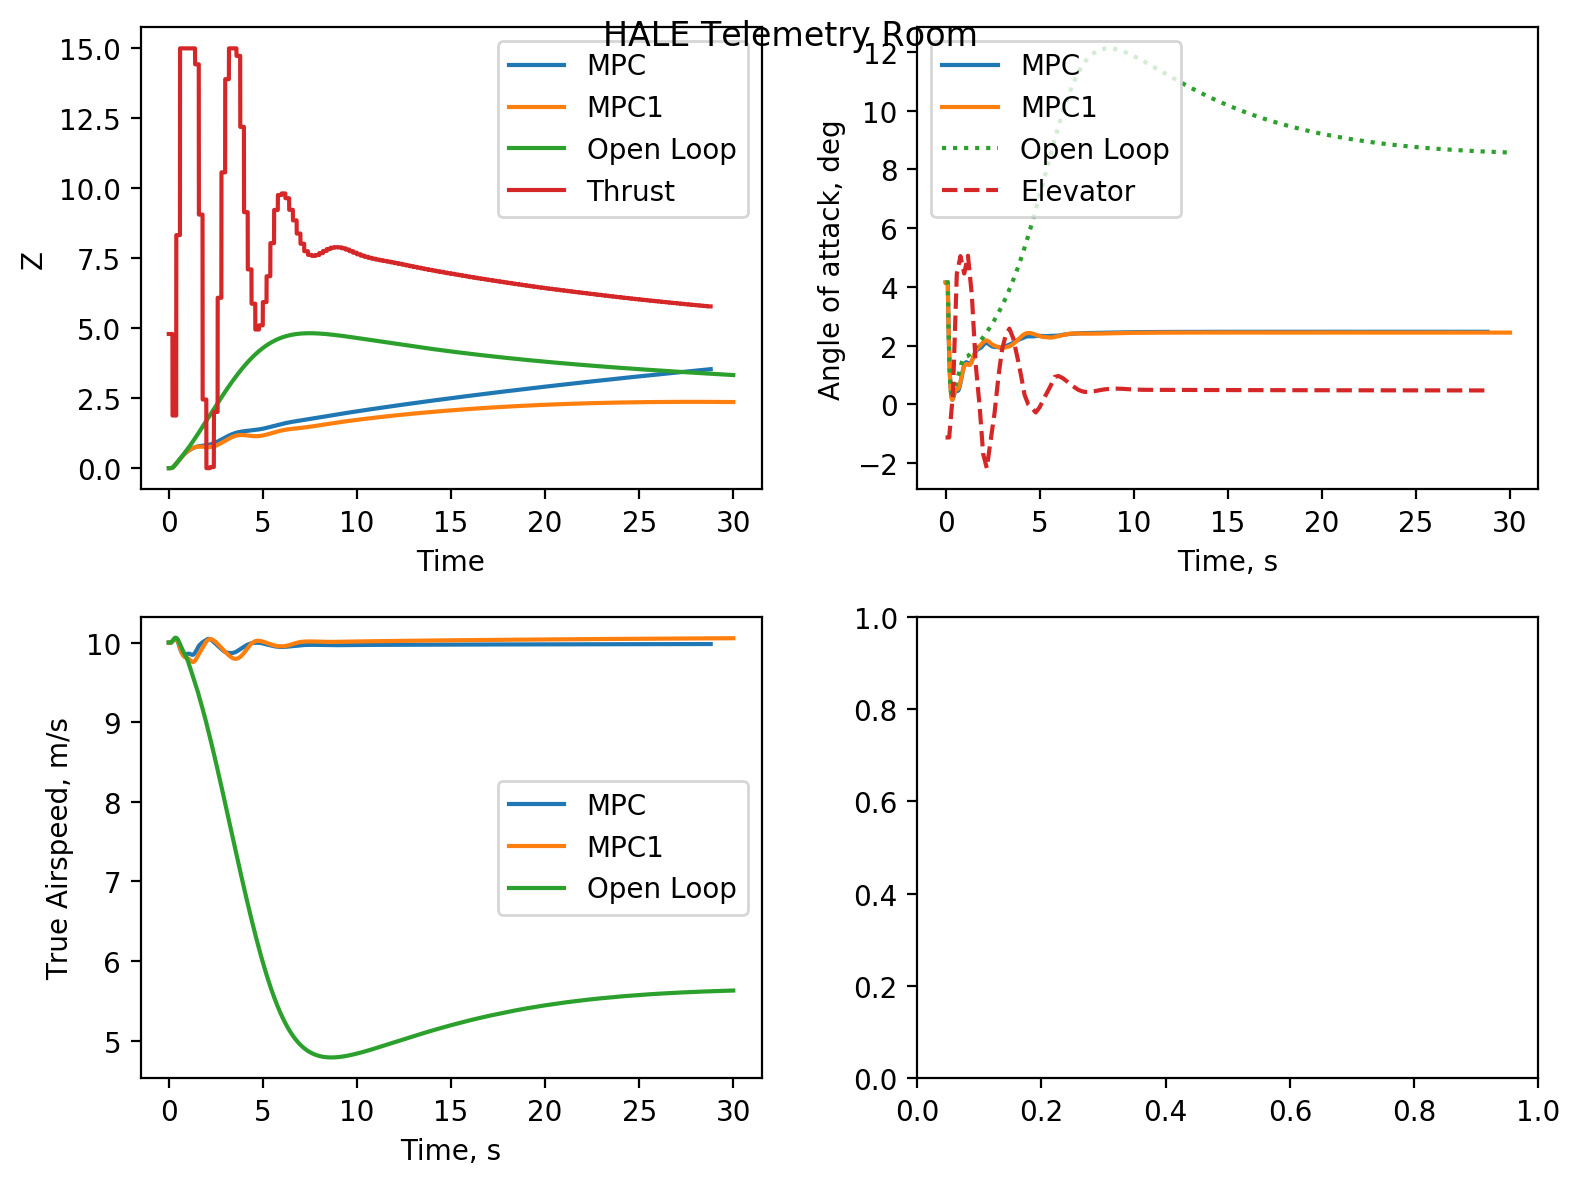

In [183]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.suptitle('HALE Telemetry Room')


ax[0, 0].plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
ax[0, 0].plot(cl1[:, 0] / 160, cl1[:, 3], label='MPC1')


ax[0, 0].plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

ax[0, 0].plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Z')
ax[0, 0].legend()

ax[0, 1].plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
ax[0, 1].plot(cl1[:, 0] / 160, aoa_cl1 * 180 / np.pi, label='MPC1')


ax[0, 1].plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop', ls=':')
ax[0, 1].plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
ax[0, 1].legend()
ax[0, 1].set_xlabel('Time, s')
ax[0, 1].set_ylabel('Angle of attack, deg')

ax[1, 0].plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
ax[1, 0].plot(cl1[:, 0] / 160, np.linalg.norm(vel_cl1[:, 1:], axis=1), label='MPC1')


ax[1, 0].plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
ax[1, 0].legend()
ax[1, 0].set_xlabel('Time, s')
ax[1, 0].set_ylabel('True Airspeed, m/s')



for a in ax.reshape(-1):
#     a.set_xlim(4.5, 5.7)
    pass
#     a.plot([780/160] * 2,[0, 10], ls=':', color='k', lw=0.5)


    
plt.tight_layout()



# Fourth attempt

In [198]:
cs = []
thrust = []
with open('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case4/input_history.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        ll = line.split(',')
        try:
            cs.append(float(ll[0]))
            thrust.append(float(ll[1]))
        except ValueError:
            pass
        
cs = np.array(cs)
thrust = np.array(thrust)

In [199]:
ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_pos.dat')

In [200]:
cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case4/WriteVariablesTime/FoR_00_for_pos.dat')

## Vertical displacement vs thrust input

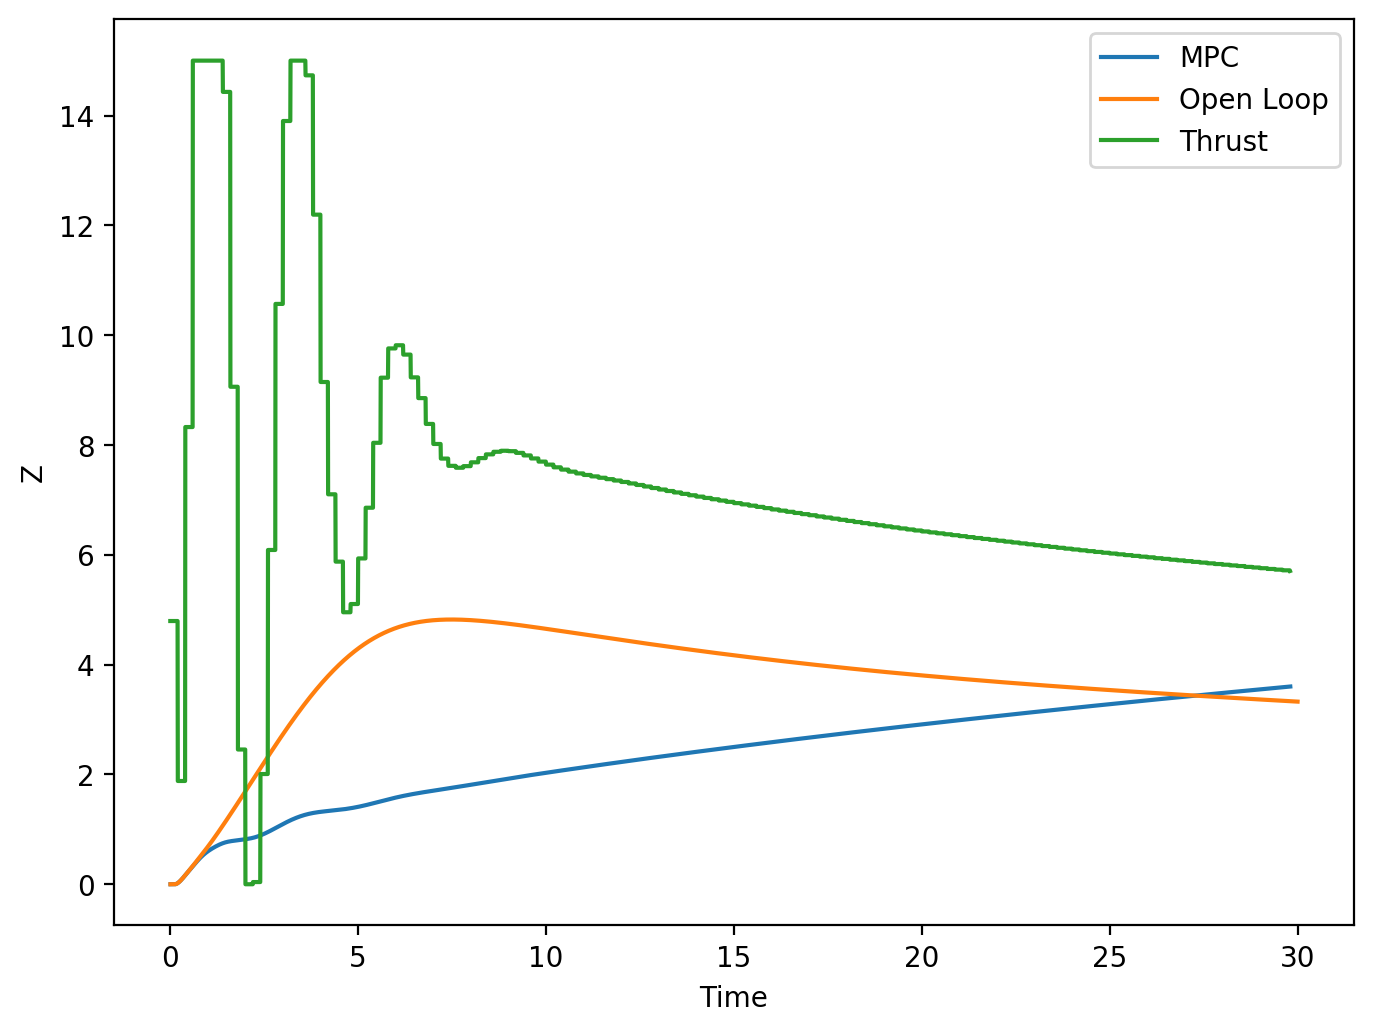

In [201]:
plt.plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
plt.plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

plt.plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
# plt.xlim(0, 6)

In [202]:
vel_cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case4/WriteVariablesTime/FoR_00_for_vel.dat')

In [203]:
vel_ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_vel.dat')

In [204]:
aoa_cl = np.arctan(vel_cl[:, 3]/vel_cl[:, 1])
aoa_ol = np.arctan(vel_ol[:, 3]/vel_ol[:, 1])

## Angle of attack vs elevator input

Text(0, 0.5, 'Angle of attack, deg')

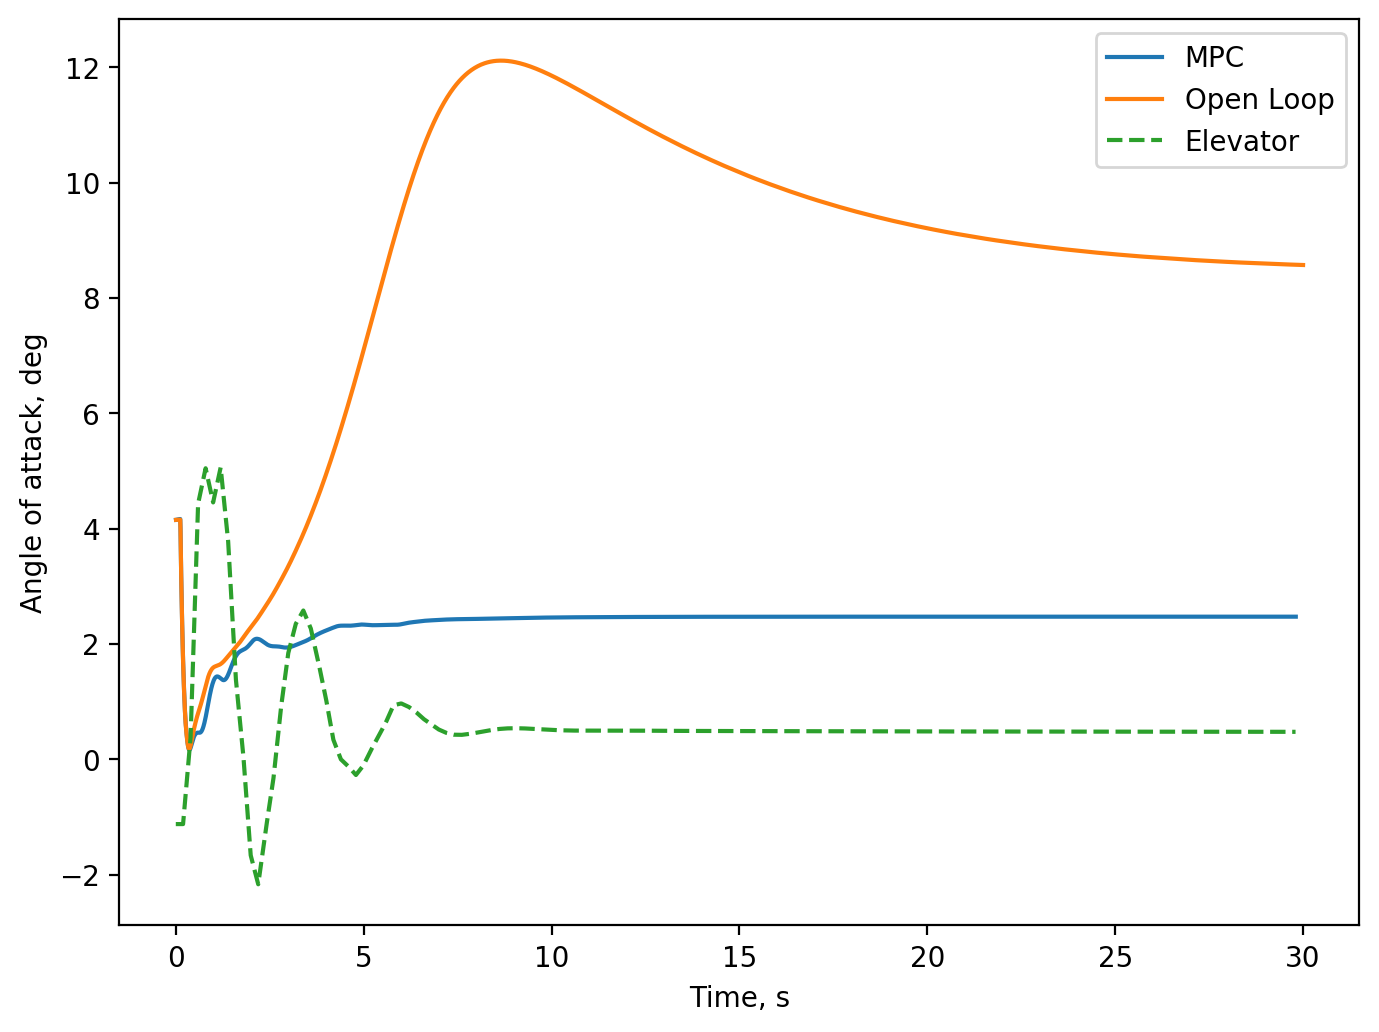

In [205]:
plt.plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
plt.plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop')
plt.plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Angle of attack, deg')

Text(0, 0.5, 'True Airspeed, m/s')

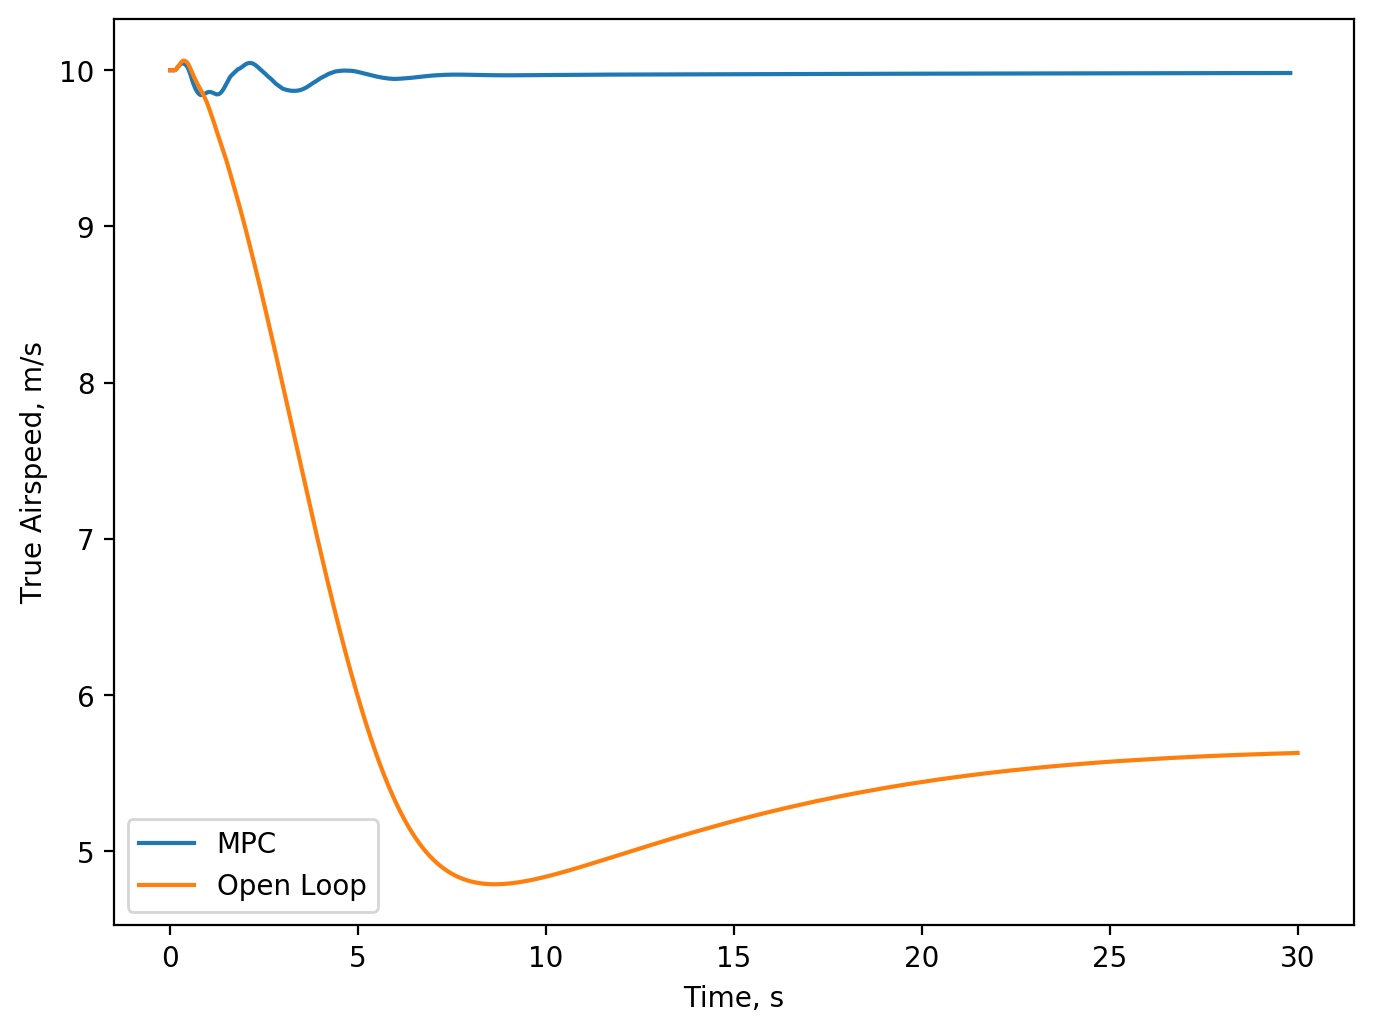

In [206]:
plt.plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
plt.plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('True Airspeed, m/s')

In [207]:
780/160

4.875

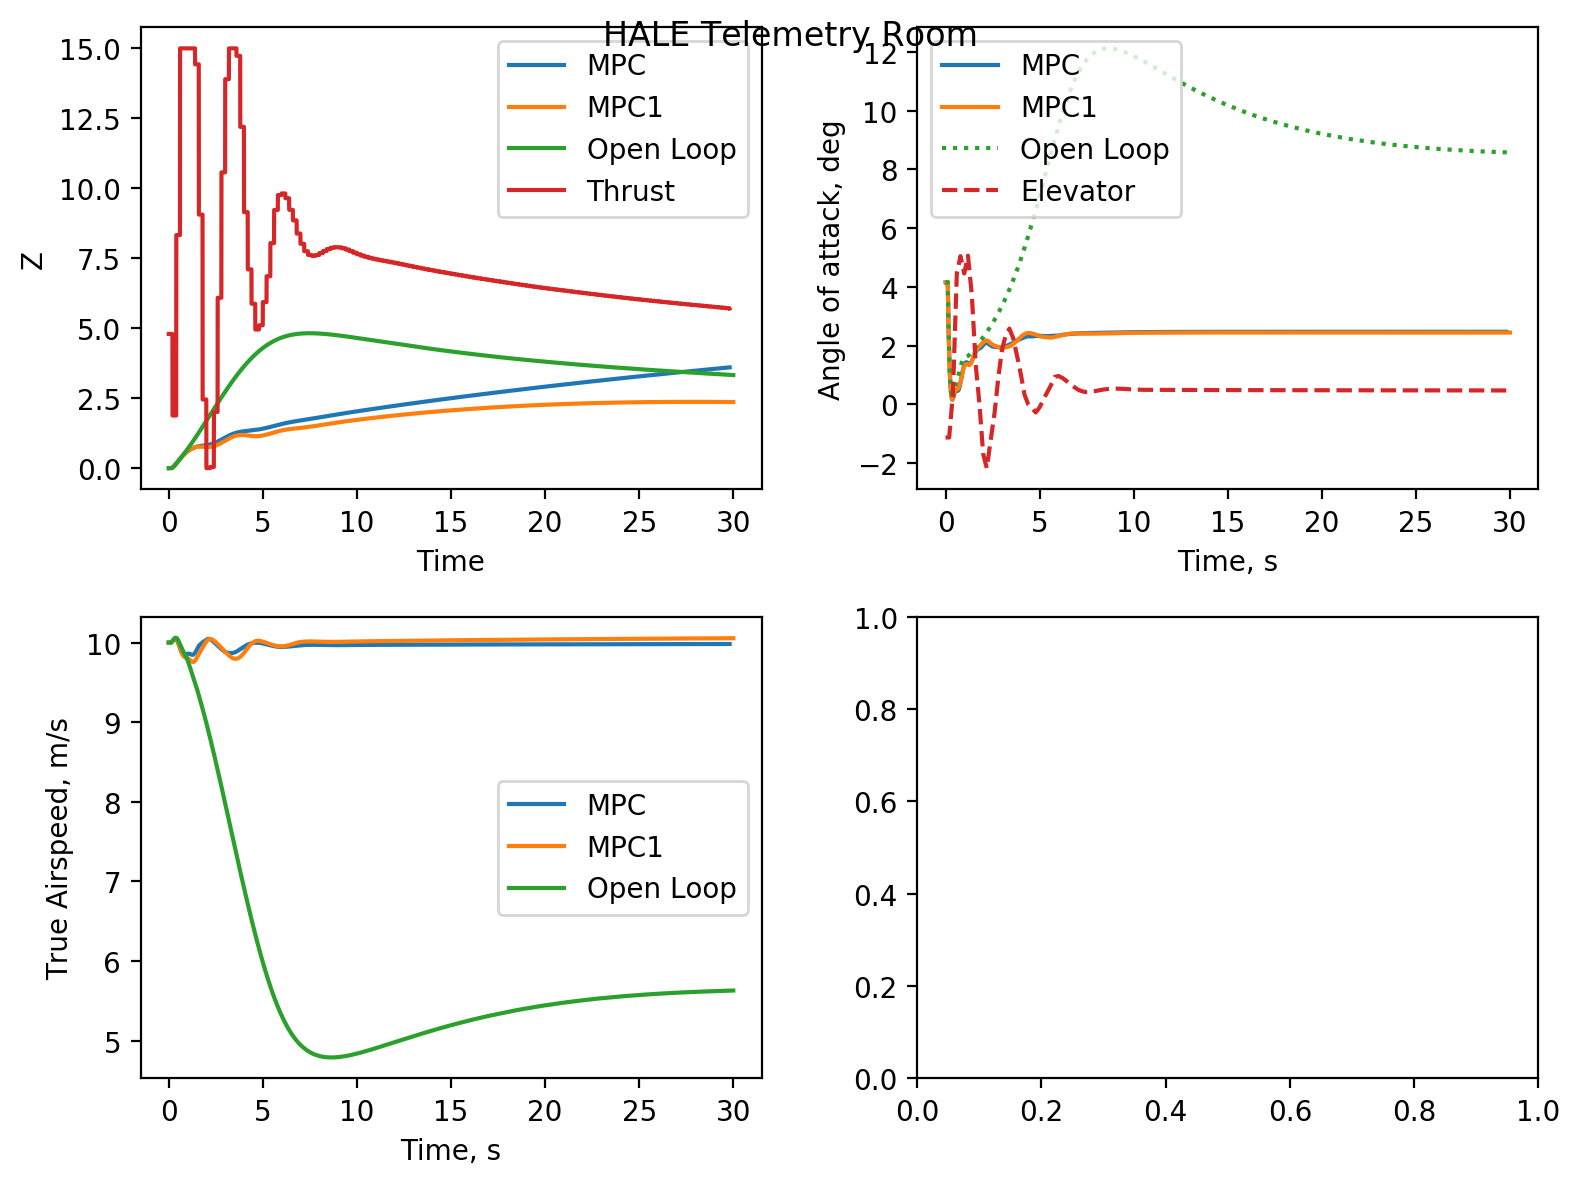

In [208]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.suptitle('HALE Telemetry Room')


ax[0, 0].plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
ax[0, 0].plot(cl1[:, 0] / 160, cl1[:, 3], label='MPC1')


ax[0, 0].plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

ax[0, 0].plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Z')
ax[0, 0].legend()

ax[0, 1].plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
ax[0, 1].plot(cl1[:, 0] / 160, aoa_cl1 * 180 / np.pi, label='MPC1')


ax[0, 1].plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop', ls=':')
ax[0, 1].plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
ax[0, 1].legend()
ax[0, 1].set_xlabel('Time, s')
ax[0, 1].set_ylabel('Angle of attack, deg')

ax[1, 0].plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
ax[1, 0].plot(cl1[:, 0] / 160, np.linalg.norm(vel_cl1[:, 1:], axis=1), label='MPC1')


ax[1, 0].plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
ax[1, 0].legend()
ax[1, 0].set_xlabel('Time, s')
ax[1, 0].set_ylabel('True Airspeed, m/s')



for a in ax.reshape(-1):
#     a.set_xlim(4.5, 5.7)
    pass
#     a.plot([780/160] * 2,[0, 10], ls=':', color='k', lw=0.5)


    
plt.tight_layout()



# Fifth Attempt 

In [246]:
cs = []
thrust = []
with open('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case5/input_history.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        ll = line.split(',')
        try:
            cs.append(float(ll[0]))
            thrust.append(float(ll[1]))
        except ValueError:
            pass
        
cs = np.array(cs)
thrust = np.array(thrust)

In [247]:
ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_pos.dat')

In [248]:
cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case5/WriteVariablesTime/FoR_00_for_pos.dat')
cl2 = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case3/WriteVariablesTime/FoR_00_for_pos.dat')

## Vertical displacement vs thrust input

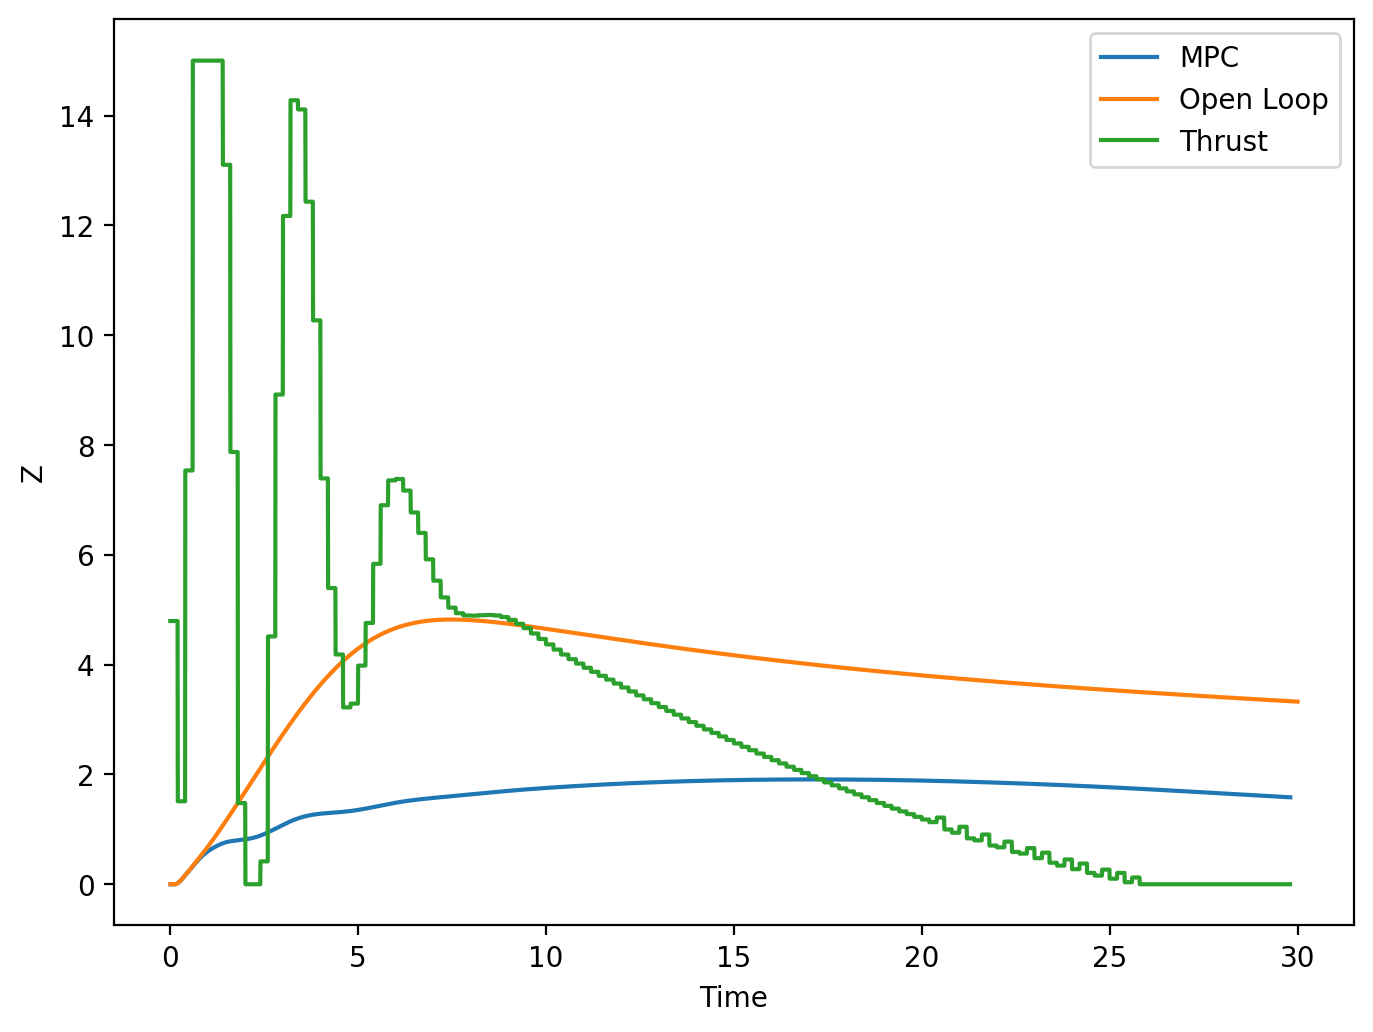

In [249]:
plt.plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
plt.plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

plt.plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
# plt.xlim(0, 6)

In [250]:
vel_cl = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case5/WriteVariablesTime/FoR_00_for_vel.dat')
vel_cl2 = np.loadtxt('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case3/WriteVariablesTime/FoR_00_for_vel.dat')

In [251]:
vel_ol = np.loadtxt('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/WriteVariablesTime/FoR_00_for_vel.dat')

In [252]:
aoa_cl = np.arctan(vel_cl[:, 3]/vel_cl[:, 1])
aoa_cl2 = np.arctan(vel_cl2[:, 3]/vel_cl2[:, 1])


aoa_ol = np.arctan(vel_ol[:, 3]/vel_ol[:, 1])

## Angle of attack vs elevator input

Text(0, 0.5, 'Angle of attack, deg')

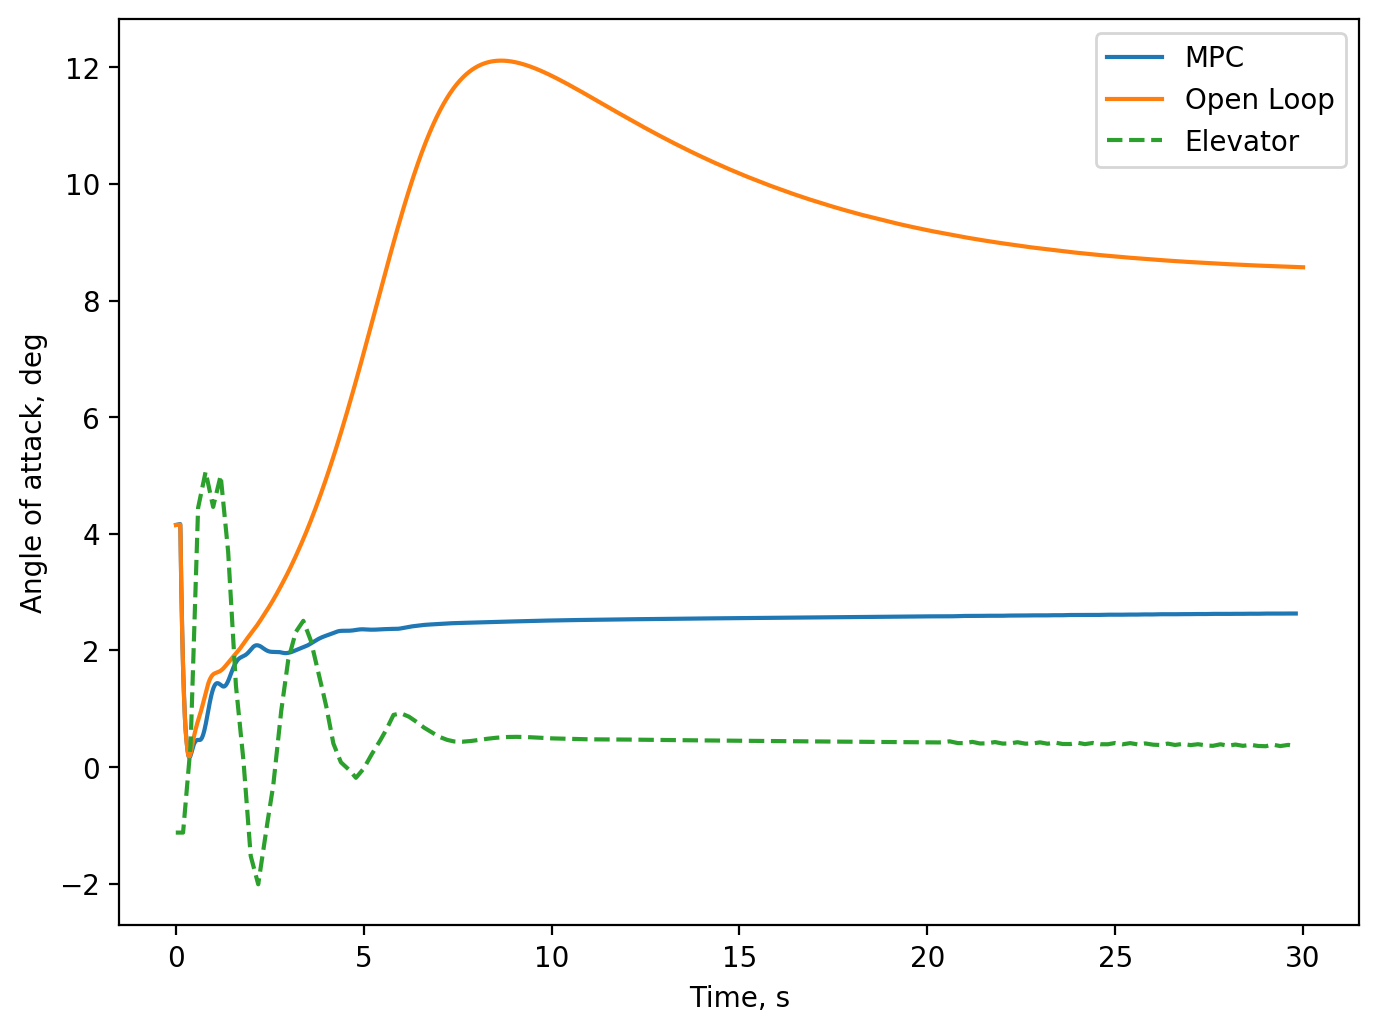

In [253]:
plt.plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
plt.plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop')
plt.plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Angle of attack, deg')

Text(0, 0.5, 'True Airspeed, m/s')

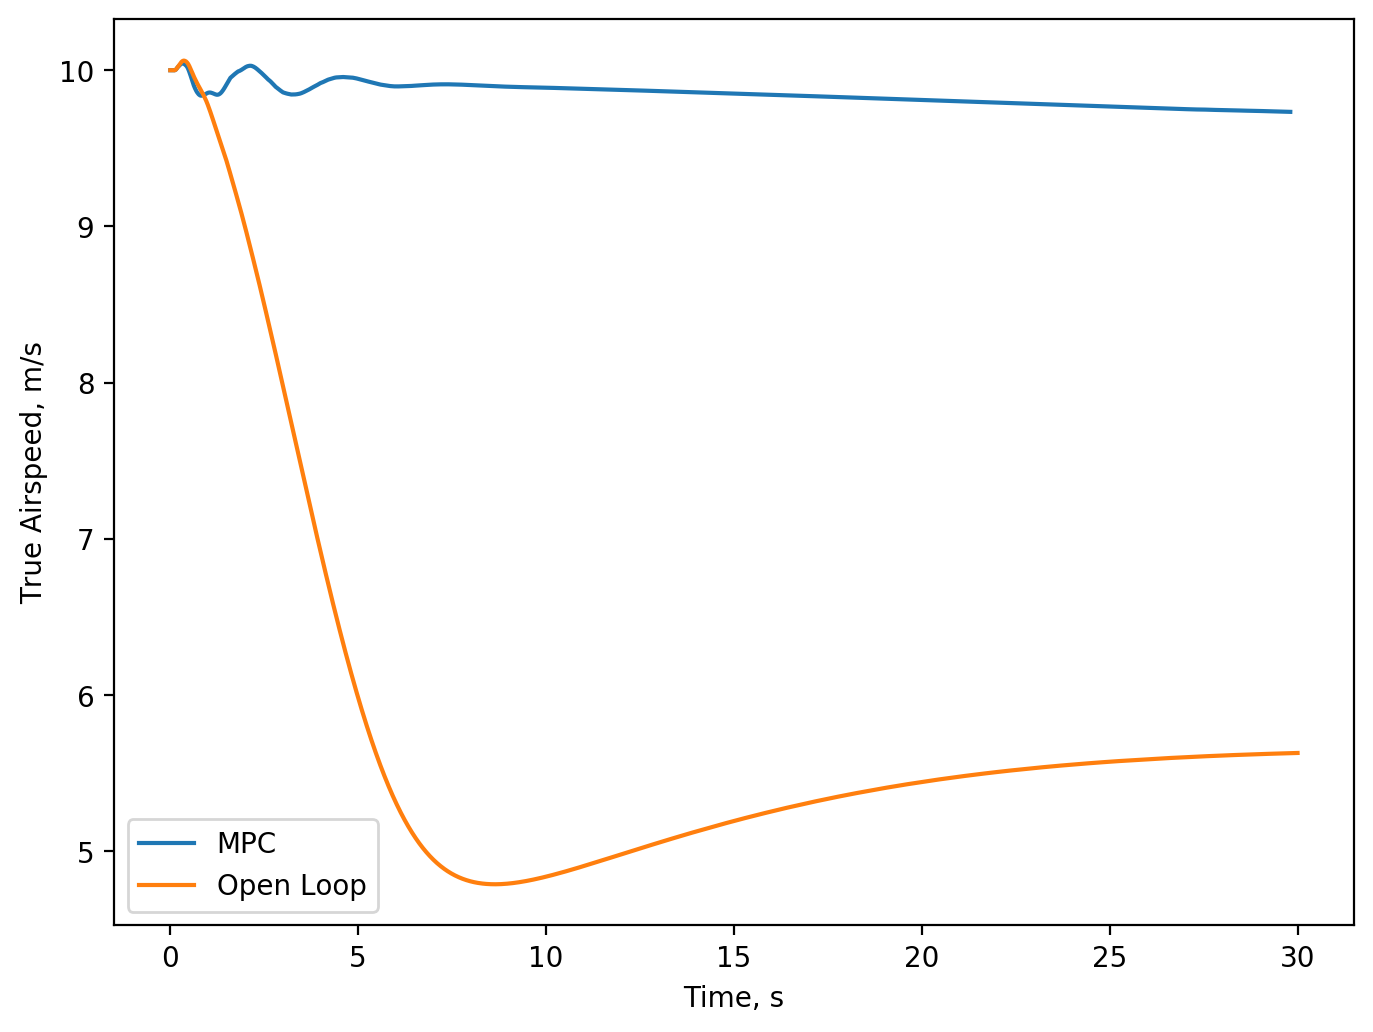

In [254]:
plt.plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
plt.plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('True Airspeed, m/s')

In [255]:
780/160

4.875

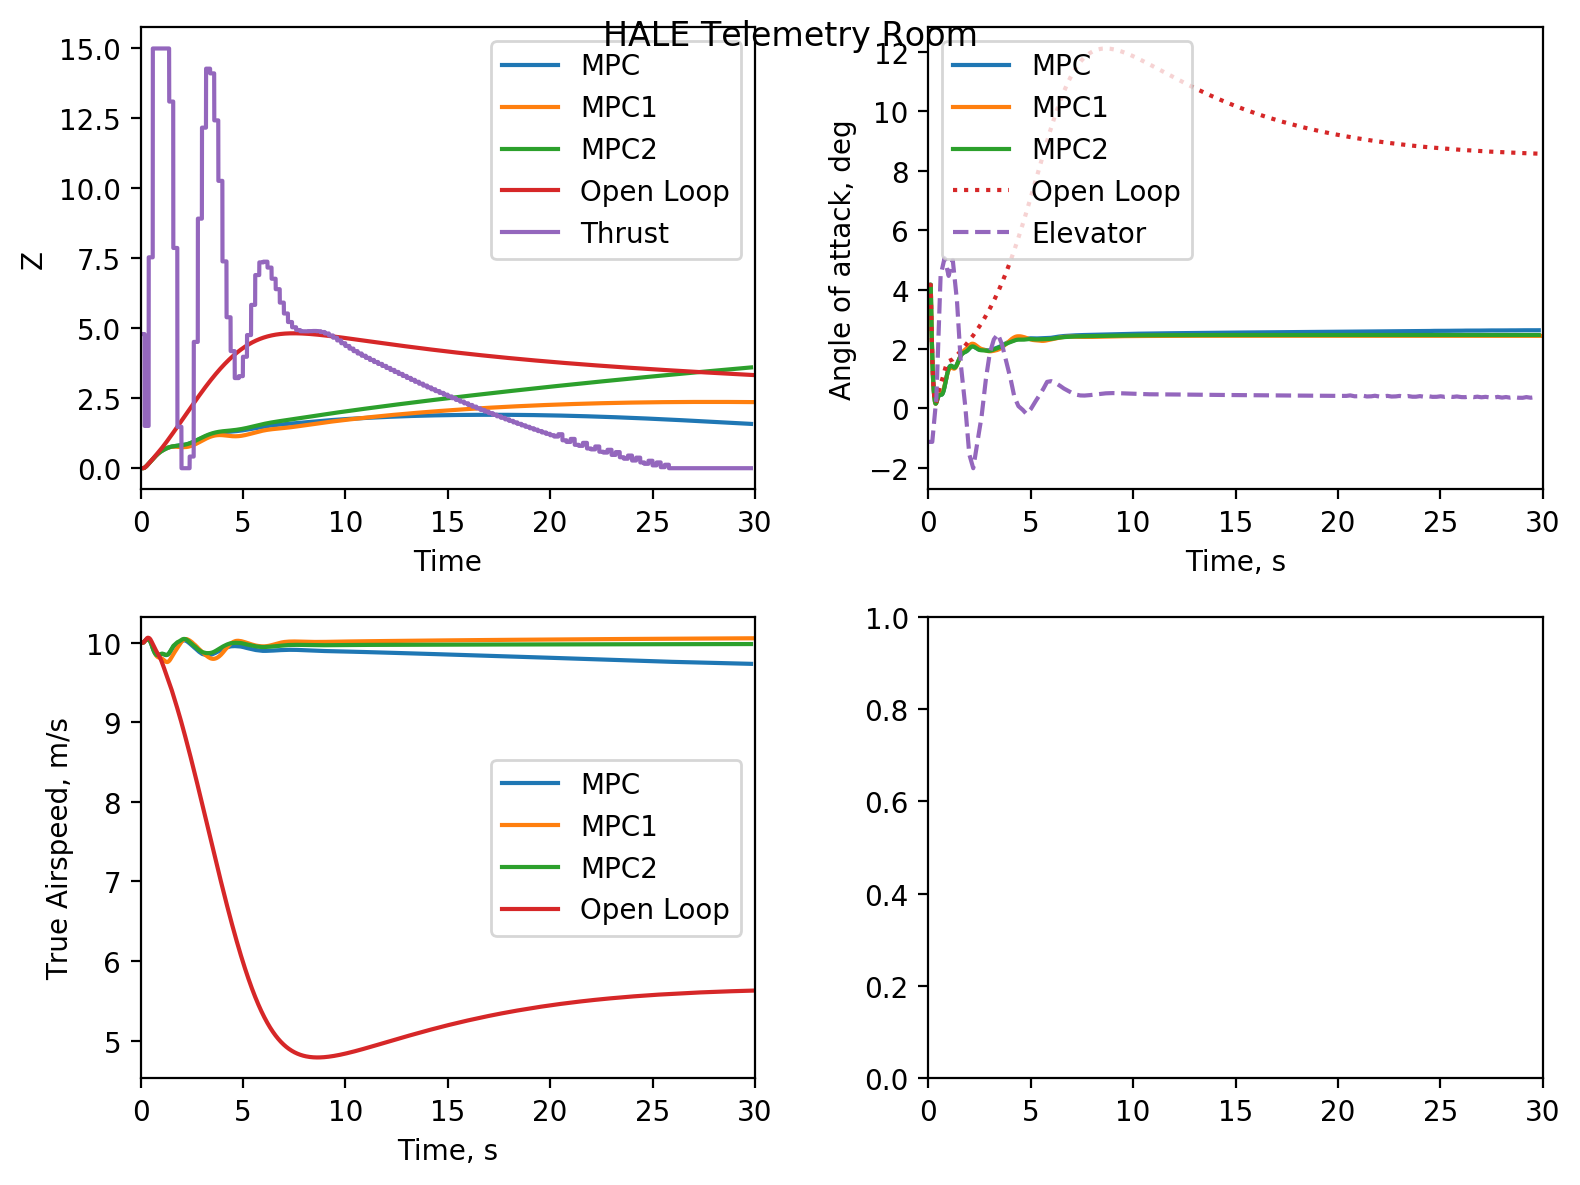

In [256]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.suptitle('HALE Telemetry Room')


ax[0, 0].plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
ax[0, 0].plot(cl1[:, 0] / 160, cl1[:, 3], label='MPC1')
ax[0, 0].plot(cl2[:, 0] / 160, cl2[:, 3], label='MPC2')




ax[0, 0].plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

ax[0, 0].plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Z')
ax[0, 0].legend()

ax[0, 1].plot(cl[:, 0] / 160, aoa_cl * 180 / np.pi, label='MPC')
ax[0, 1].plot(cl1[:, 0] / 160, aoa_cl1 * 180 / np.pi, label='MPC1')
ax[0, 1].plot(cl2[:, 0] / 160, aoa_cl2 * 180 / np.pi, label='MPC2')


ax[0, 1].plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop', ls=':')
ax[0, 1].plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

# plt.xlim(0, 6)
ax[0, 1].legend()
ax[0, 1].set_xlabel('Time, s')
ax[0, 1].set_ylabel('Angle of attack, deg')

ax[1, 0].plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
ax[1, 0].plot(cl1[:, 0] / 160, np.linalg.norm(vel_cl1[:, 1:], axis=1), label='MPC1')
ax[1, 0].plot(cl2[:, 0] / 160, np.linalg.norm(vel_cl2[:, 1:], axis=1), label='MPC2')




ax[1, 0].plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

# plt.xlim(0, 6)
ax[1, 0].legend()
ax[1, 0].set_xlabel('Time, s')
ax[1, 0].set_ylabel('True Airspeed, m/s')



for a in ax.reshape(-1):
    a.set_xlim(0, 30)
    pass
#     a.plot([780/160] * 2,[0, 10], ls=':', color='k', lw=0.5)


    
plt.tight_layout()





In [293]:
def postprocess_case(path_to_case, filename):
    cs = []
    thrust = []
    try:
        with open(path_to_case + 'input_history.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                ll = line.split(',')
                try:
                    cs.append(float(ll[0]))
                    thrust.append(float(ll[1]))
                except ValueError:
                    pass
        np.savetxt(path_to_case + filename + '_inputs.txt', np.column_stack((cs, thrust)))
    except FileNotFoundError:
        print('No input found - assuming open loop case')

    cs = np.array(cs)
    thrust = np.array(thrust)
    
    cl = np.loadtxt(path_to_case + '/WriteVariablesTime/FoR_00_for_pos.dat')
    vel_cl = np.loadtxt(path_to_case + 'WriteVariablesTime/FoR_00_for_vel.dat')
    quat = np.loadtxt(path_to_case + 'WriteVariablesTime/FoR_00_quat.dat')


    aoa_cl = np.arctan(vel_cl[:, 3]/vel_cl[:, 1])
    pitch = np.array([algebra.quat2euler(quat[n, -4:]) for n in range(quat.shape[0])])[:, 1]
    
    np.savetxt(path_to_case + filename + '_outputs.txt', np.column_stack((cl[:, :4], vel_cl[:, 1:4], aoa_cl, pitch)))
    
    return np.column_stack((cl[:, :4], vel_cl[:, 1:4], aoa_cl, pitch))
    
#     plt.plot(cl[:, 0], pitch * 180 /np.pi)
#     plt.plot(cl[:, 0], aoa_cl * 180 / np.pi)

In [326]:
def plot_case(path_to_case):
    cs = []
    thrust = []
    try:
        with open(path_to_case + 'input_history.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                ll = line.split(',')
                try:
                    cs.append(float(ll[0]))
                    thrust.append(float(ll[1]))
                except ValueError:
                    pass
    except FileNotFoundError:
        print('No input found - assuming open loop case')

    cs = np.array(cs)
    thrust = np.array(thrust)
    
    cl = np.loadtxt(path_to_case + '/WriteVariablesTime/FoR_00_for_pos.dat')
    vel_cl = np.loadtxt(path_to_case + 'WriteVariablesTime/FoR_00_for_vel.dat')
    quat = np.loadtxt(path_to_case + 'WriteVariablesTime/FoR_00_quat.dat')


    aoa_cl = np.arctan(vel_cl[:, 3]/vel_cl[:, 1])
    pitch = np.array([algebra.quat2euler(quat[n, -4:]) for n in range(quat.shape[0])])[:, 1]
    
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.suptitle('HALE Telemetry Room')


    ax[0, 0].plot(cl[:, 0] / 160, cl[:, 3], label='MPC')
    ax[0, 0].plot(cl1[:, 0] / 160, cl1[:, 3], label='MPC1')
    ax[0, 0].plot(cl2[:, 0] / 160, cl2[:, 3], label='MPC2')


    ax[0, 0].plot(ol[:, 0] / 160, ol[:ol.shape[0], 3], label='Open Loop')

    ax[0, 0].plot(np.arange(len(thrust)) / 160, thrust, label='Thrust')
    ax[0, 0].set_xlabel('Time')
    ax[0, 0].set_ylabel('Z')
    ax[0, 0].legend()

    ax[0, 1].plot(cl[:, 0] / 160, aoa_cl * 180/np.pi, label='MPC')
    ax[0, 1].plot(cl1[:, 0] / 160, aoa_cl1 * 180 / np.pi, label='MPC1')
    ax[0, 1].plot(cl2[:, 0] / 160, aoa_cl2 * 180 / np.pi, label='MPC2')


    ax[0, 1].plot(ol[:, 0] / 160, aoa_ol * 180 / np.pi, label='Open Loop', ls=':')
    ax[0, 1].plot(np.arange(len(cs)) / 160, cs * 180 / np.pi, ls='--', label='Elevator')

    # plt.xlim(0, 6)
    ax[0, 1].legend()
    ax[0, 1].set_xlabel('Time, s')
    ax[0, 1].set_ylabel('Angle of attack, deg')

    ax[1, 0].plot(cl[:, 0] / 160, np.linalg.norm(vel_cl[:, 1:], axis=1), label='MPC')
    ax[1, 0].plot(cl1[:, 0] / 160, np.linalg.norm(vel_cl1[:, 1:], axis=1), label='MPC1')
    ax[1, 0].plot(cl2[:, 0] / 160, np.linalg.norm(vel_cl2[:, 1:], axis=1), label='MPC2')




    ax[1, 0].plot(ol[:, 0] / 160, np.linalg.norm(vel_ol[:, 1:], axis=1), label='Open Loop')

    # plt.xlim(0, 6)
    ax[1, 0].legend()
    ax[1, 0].set_xlabel('Time, s')
    ax[1, 0].set_ylabel('True Airspeed, m/s')

    ax[1, 1].plot(cl[:, 0] / 160, pitch * 180/np.pi, label='MPC')
    ax[1, 1].plot(ol[:, 0] / 160, ol_pitch * 180/np.pi, ls=':', label='Open Loop')

    # plt.xlim(0, 6)
    ax[1, 1].legend()
    ax[1, 1].set_xlabel('Time, s')
    ax[1, 1].set_ylabel('Pitch')

    for a in ax.reshape(-1):
        a.set_xlim(0, 30)
        pass
    #     a.plot([780/160] * 2,[0, 10], ls=':', color='k', lw=0.5)



    plt.tight_layout()
    return fig, ax

In [292]:
postprocess_case('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case5/', 'case5')
postprocess_case('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case4/', 'case4')
postprocess_case('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop/', 'case0')
postprocess_case('/home/ng213/2TB/HH_HALE/03_PayloadDrop/output/simple_HALE_mass_centredrop/', 'openloop')
postprocess_case('/home/ng213/2TB/HH_HALE/07_Dynamic/output/simple_HALE_elevator_alphatrim/', 'elevator')

No input found - assuming open loop case
No input found - assuming open loop case


No input found - assuming open loop case


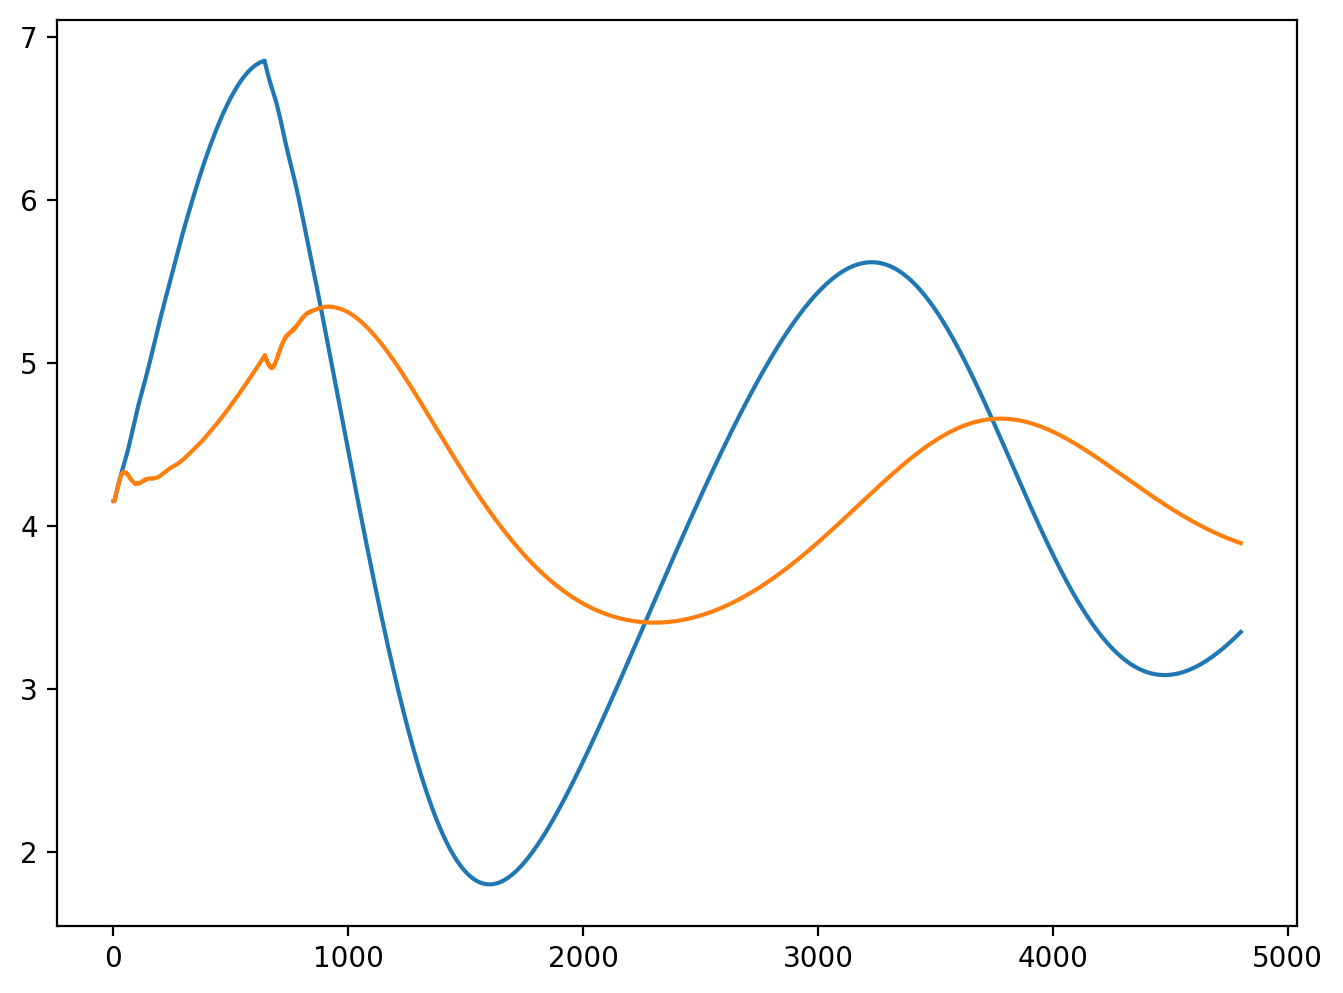

In [289]:
postprocess_case('/home/ng213/2TB/HH_HALE/07_Dynamic/output/simple_HALE_elevator_alphatrim/', 'elevator')

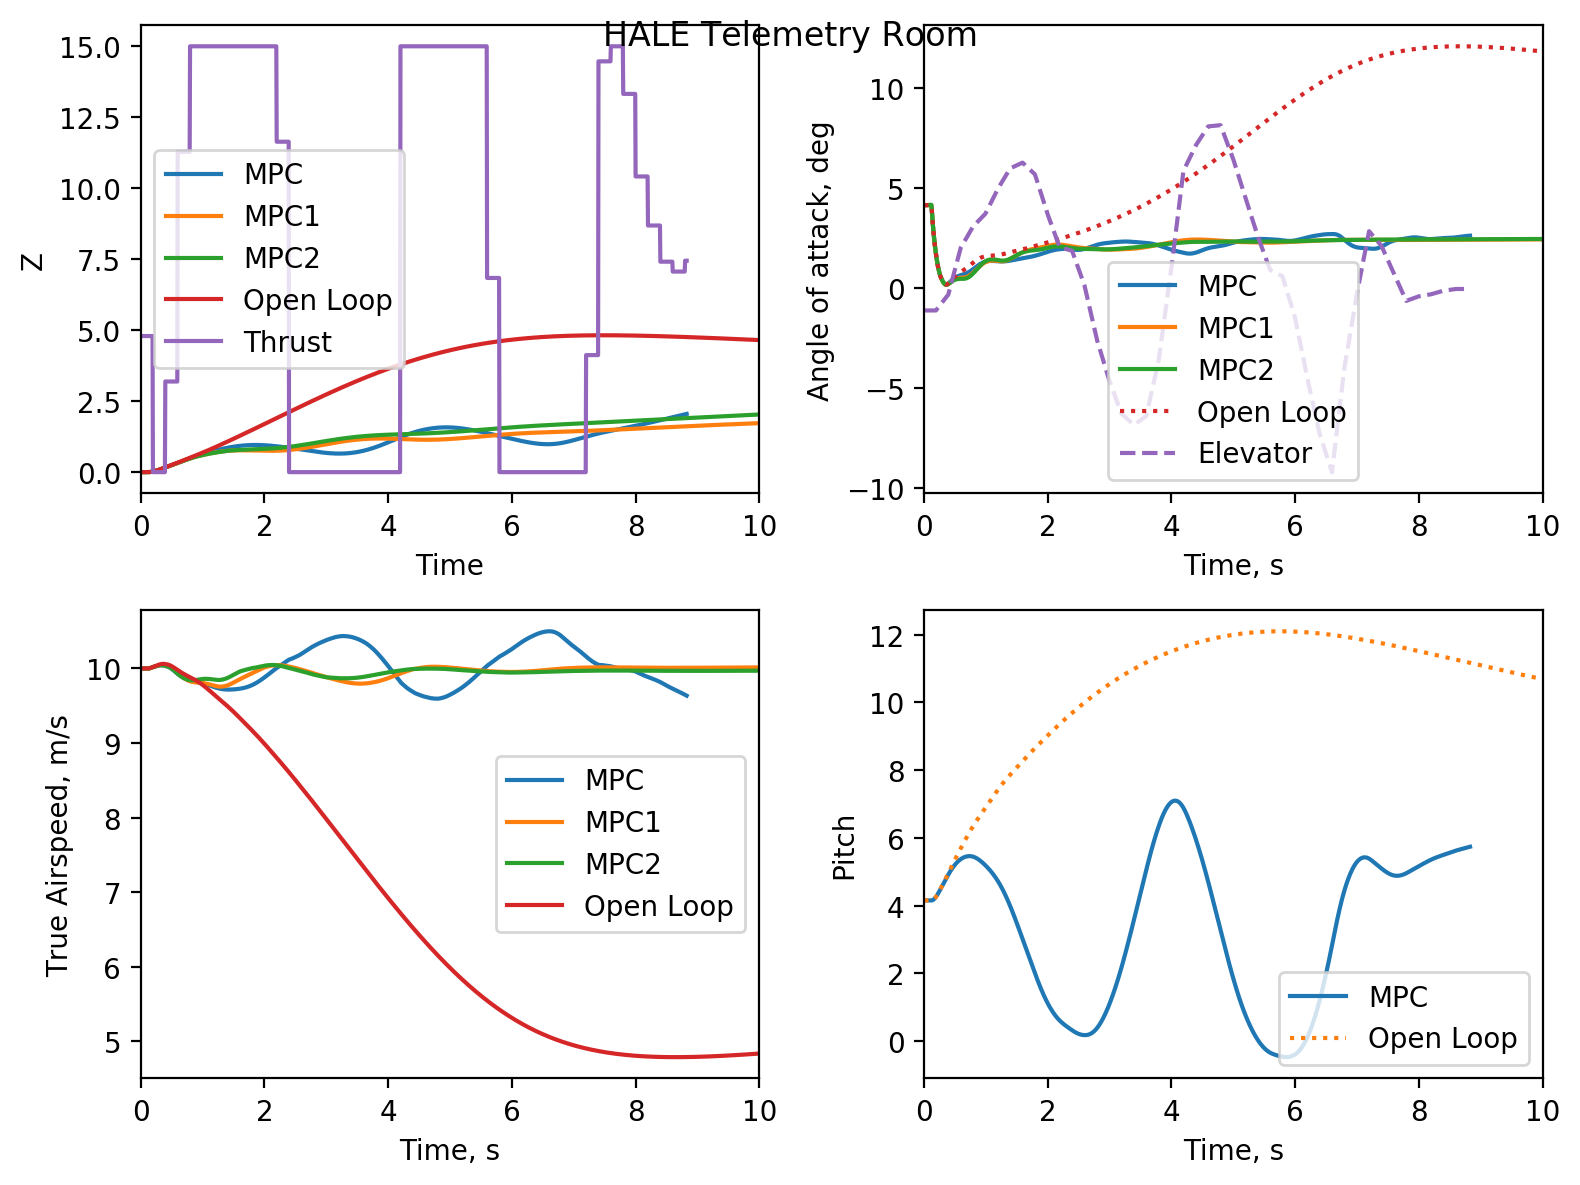

In [330]:
fig, ax = plot_case('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case18/')
for a in ax.reshape(-1):
    a.set_xlim(0, 10)

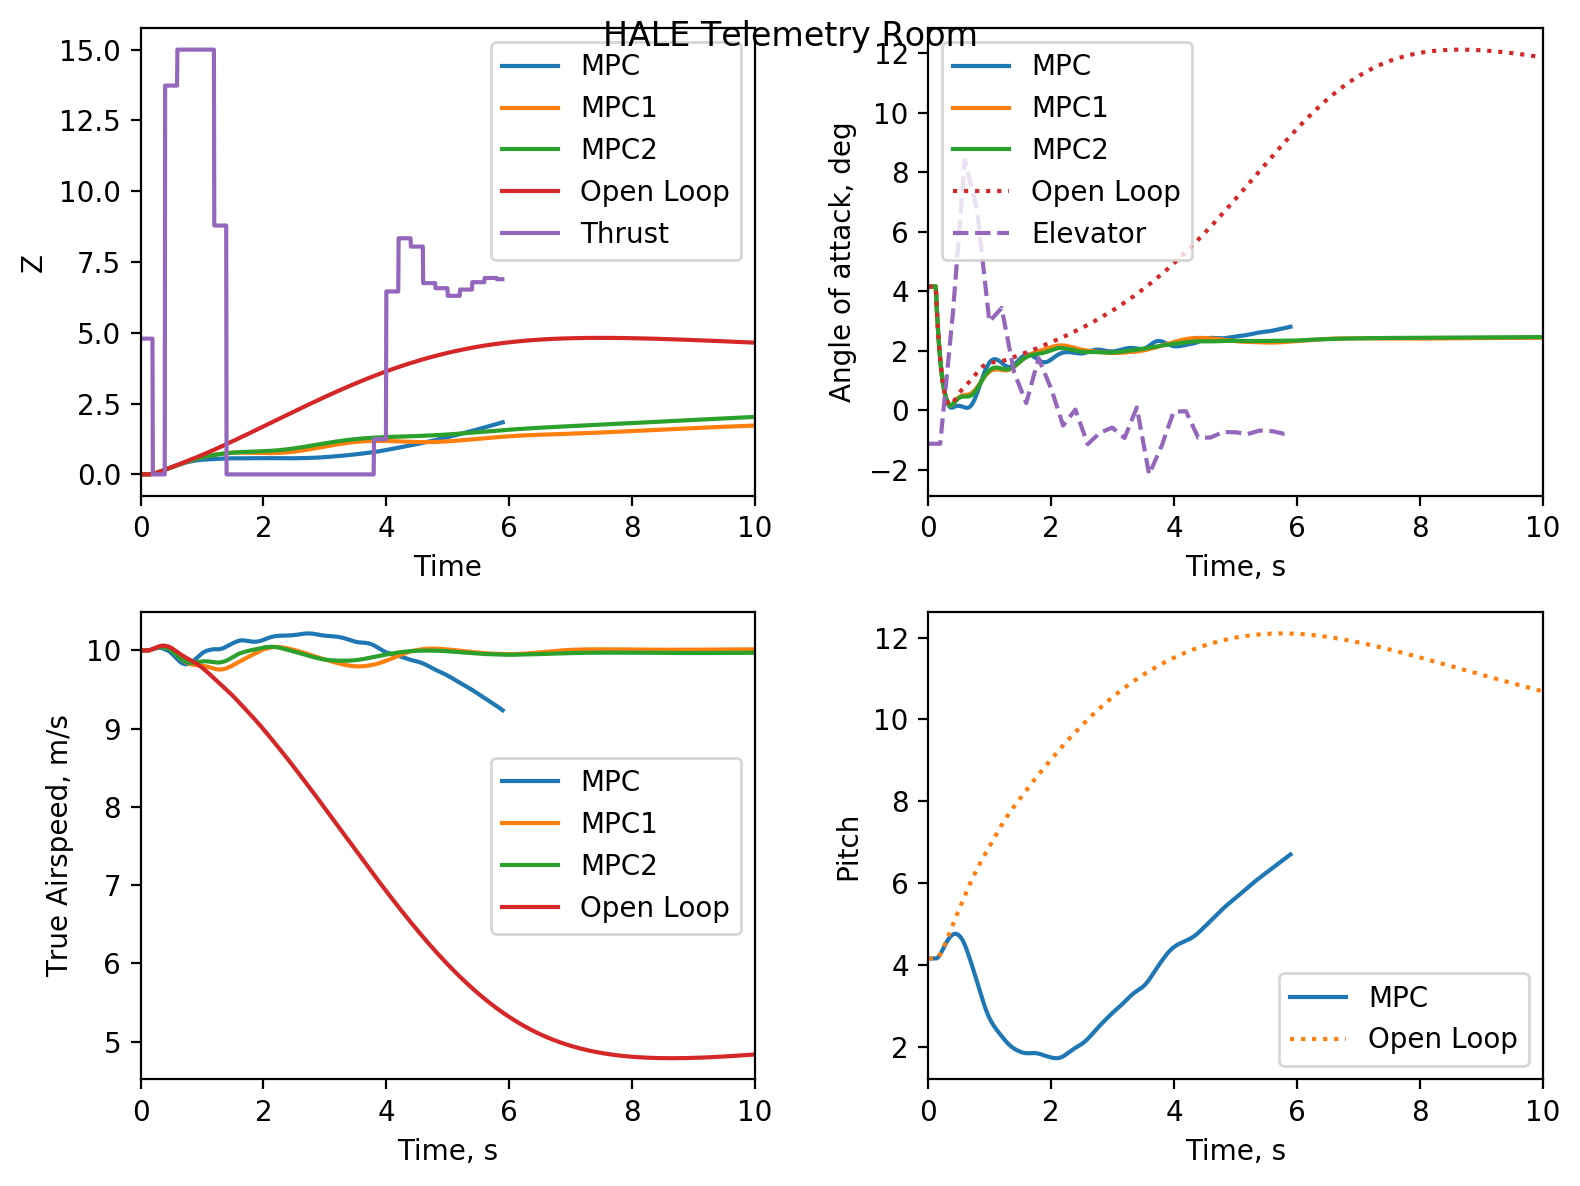

In [332]:
fig, ax = plot_case('/home/ng213/2TB/HH_HALE/09_MPC_Simulation/output/simple_HALE_mpc_mass_centredrop_case19/')
for a in ax.reshape(-1):
    a.set_xlim(0, 10)